Preprocessed image saved to: C:\Users\91948\Desktop\palmleaf_test\70\preprocessed.png


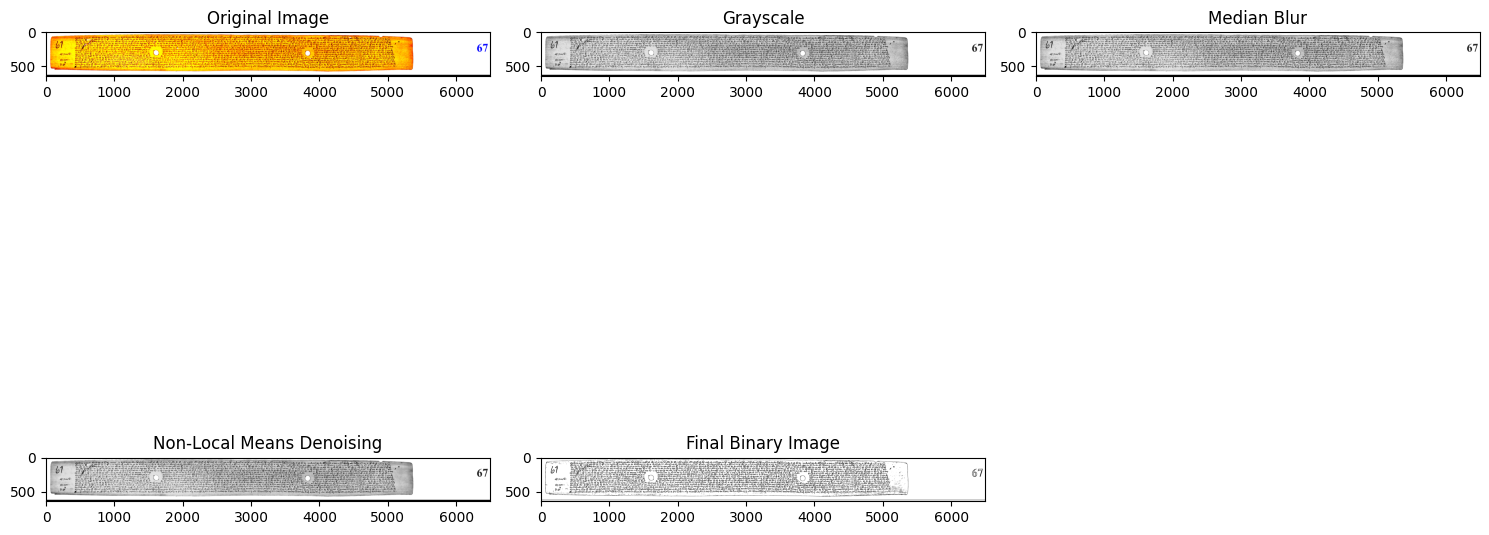

All processing steps saved to: C:\Users\91948\Desktop\palmleaf_test\70\pre_steps


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def preprocess(input_path, output_path=None, show_steps=False):
    image = cv2.imread(input_path)
    if image is None:
        raise ValueError(f"Error reading image from {input_path}")

    original = image.copy()
    results = {}

    # grayscale conversion
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    results["grayscale"] = gray.copy()

    # median blur+nlmd
    blurred = cv2.medianBlur(gray, 3)
    results["median_blur"] = blurred.copy()

    filtered = cv2.fastNlMeansDenoising(blurred, None, 30, 7, 21)
    results["denoised"] = filtered.copy()

    # Adaptive thresholding
    final_img = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
    results["final"] = final_img.copy()

    if output_path:
        cv2.imwrite(output_path, final_img)
        print(f"Preprocessed image saved to: {output_path}")
        
    if show_steps:
        display(original, results)

    return final_img, results

def display(original, results):

    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 10))

    plt.subplot(231)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    
    plt.subplot(232)
    plt.imshow(results["grayscale"], cmap='gray')
    plt.title('Grayscale')

    
    plt.subplot(233)
    plt.imshow(results["median_blur"], cmap='gray')
    plt.title('Median Blur')

    
    plt.subplot(234)
    plt.imshow(results["denoised"], cmap='gray')
    plt.title('Non-Local Means Denoising')

    
    plt.subplot(235)
    plt.imshow(results["final"], cmap='gray')
    plt.title('Final Binary Image')

    plt.tight_layout()
    plt.show()

def save(input_path, output_dir):
    
    image = cv2.imread(input_path)
    if image is None:
        raise ValueError(f"Error reading image from {input_path}")

    os.makedirs(output_dir, exist_ok=True)
    
    _, results = preprocess(input_path, show_steps=False)

    original = image.copy()
    cv2.imwrite(os.path.join(output_dir, "1_original.png"), original)

    # Save each step
    cv2.imwrite(os.path.join(output_dir, "2_grayscale.png"), results["grayscale"])
    cv2.imwrite(os.path.join(output_dir, "3_median_blur.png"), results["median_blur"])
    cv2.imwrite(os.path.join(output_dir, "4_denoised.png"), results["denoised"])
    cv2.imwrite(os.path.join(output_dir, "5_final.png"), results["final"])

    print(f"All processing steps saved to: {output_dir}")

if __name__ == "__main__":
    input_image = r"C:\Users\91948\Desktop\palmleaf_test\70\original.png"
    output_image = r"C:\Users\91948\Desktop\palmleaf_test\70\preprocessed.png"

    final_img, _ = preprocess(input_image, output_image, show_steps=True)
    output_steps_dir = r"C:\Users\91948\Desktop\palmleaf_test\70\pre_steps"
    save(input_image, output_steps_dir)

   


In [24]:
import cv2
import numpy as np
import imutils

image = cv2.imread(r"C:\Users\91948\Desktop\palmleaf_test\70\pre_steps\5_final.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

dilate = cv2.dilate(thresh1, None, iterations=2)

cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0]

for i, cnt in enumerate(cnts):
    print(f"Contour {i}: type={type(cnt)}, shape={cnt.shape if hasattr(cnt, 'shape') else 'No shape'}, dtype={cnt.dtype if hasattr(cnt, 'dtype') else 'No dtype'}")

Contour 0: type=<class 'numpy.ndarray'>, shape=(6, 1, 2), dtype=int32
Contour 1: type=<class 'numpy.ndarray'>, shape=(8, 1, 2), dtype=int32
Contour 2: type=<class 'numpy.ndarray'>, shape=(8, 1, 2), dtype=int32
Contour 3: type=<class 'numpy.ndarray'>, shape=(18, 1, 2), dtype=int32
Contour 4: type=<class 'numpy.ndarray'>, shape=(40, 1, 2), dtype=int32
Contour 5: type=<class 'numpy.ndarray'>, shape=(24, 1, 2), dtype=int32
Contour 6: type=<class 'numpy.ndarray'>, shape=(125, 1, 2), dtype=int32
Contour 7: type=<class 'numpy.ndarray'>, shape=(46, 1, 2), dtype=int32
Contour 8: type=<class 'numpy.ndarray'>, shape=(4, 1, 2), dtype=int32
Contour 9: type=<class 'numpy.ndarray'>, shape=(12, 1, 2), dtype=int32
Contour 10: type=<class 'numpy.ndarray'>, shape=(24, 1, 2), dtype=int32
Contour 11: type=<class 'numpy.ndarray'>, shape=(49, 1, 2), dtype=int32
Contour 12: type=<class 'numpy.ndarray'>, shape=(43, 1, 2), dtype=int32
Contour 13: type=<class 'numpy.ndarray'>, shape=(8, 1, 2), dtype=int32
Contou

In [25]:
import cv2
import os
import numpy as np

output_path = r"C:\Users\91948\Desktop\palmleaf_test\70\70_cleaned.png"

processed_image = image.copy()

fixed_cnts = []
for cnt in cnts:
    if cnt.shape[1] == 4: 
        fixed_cnt = cnt[:, :2].reshape(-1, 1, 2)
        fixed_cnts.append(fixed_cnt)
    else:
        fixed_cnts.append(cnt)

# contours sorted
sorted_ctrs = sorted(fixed_cnts, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * image.shape[1])

# each contour processed
i = 0
for cnt in sorted_ctrs:
    # small contours ignored
    if cv2.contourArea(cnt) < 0:
        continue

    # bounding box
    x, y, w, h = cv2.boundingRect(cnt)

    # only contours in desired range taken into consideration
    if not (w > 0 and h > 0 and w < 20 and h < 20):
        continue

    # mask created for current contour
    mask = np.zeros(processed_image.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, 255, -1)

    # contour area replaced with white pixels
    processed_image[mask == 255] = [255, 255, 255]

    i += 1

# cleaned image saved
cv2.imwrite(output_path, processed_image)

print(f"Processed {i} contours and saved processed image to '{output_path}'")

Processed 294 contours and saved processed image to 'C:\Users\91948\Desktop\palmleaf_test\70\70_cleaned.png'


In [ ]:
import subprocess

def super_resolve_image(input_image_path, output_folder):
    
    command = [
        "python",
        r"C:\Users\91948\Desktop\final\super_res_mod.py",
        "-m", r"C:\Users\91948\Desktop\final\FSRCNN_x4.pb",
        "-i", input_image_path,
        "-o", output_folder
    ]

    try:
        result = subprocess.run(command, capture_output=True, text=True)

        if result.returncode == 0:
            print(f"Successfully processed image: {input_image_path}")
        else:
            print(f"Error processing image: {input_image_path}")
            print(f"Error output: {result.stderr}")

    except Exception as e:
        print(f"An error occurred: {e}")


if __name__ == "__main__":
    
    input_image = r"C:\Users\91948\Desktop\palmleaf_test\61\cleaned.png"

    output_folder = r"C:\Users\91948\Desktop\palmleaf_test\61"

    super_resolve_image(input_image, output_folder)

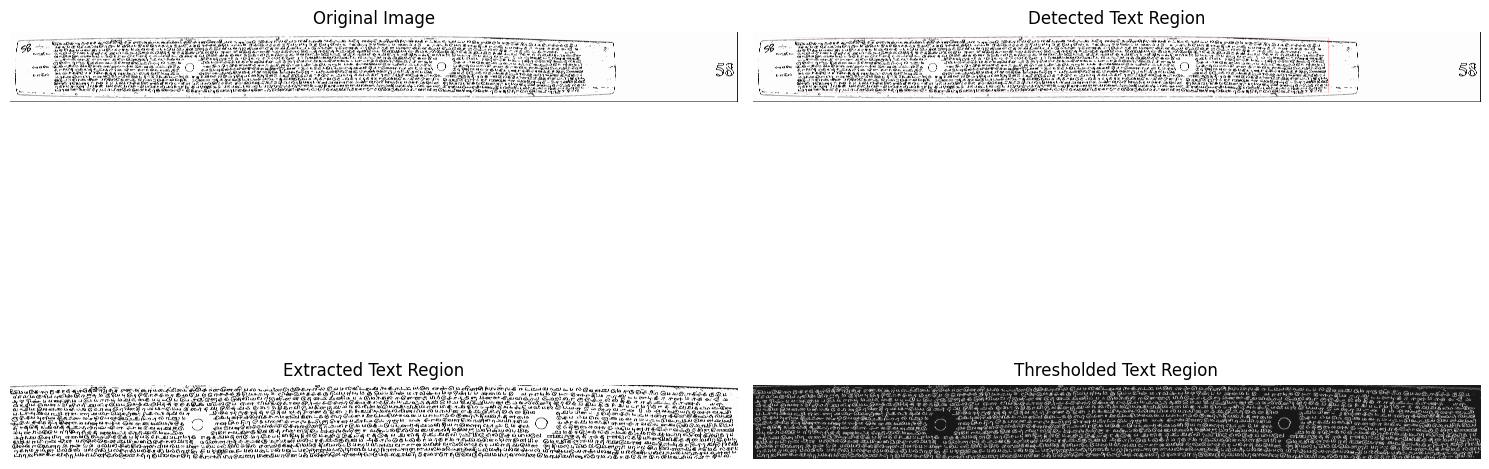

Extracted text region saved to C:\Users\91948\Desktop\palmleaf_test\61\text_extraction\extracted_text.jpg
Text region dimensions: (1907, 18661, 3)
Horizontal region: Rows 203 to 2110
Vertical region: Columns 1478 to 20139


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


output_dir = r"C:\Users\91948\Desktop\palmleaf_test\61\text_extraction"
os.makedirs(output_dir, exist_ok=True)

img = cv2.imread(r"C:\Users\91948\Desktop\palmleaf_test\61\cleaned_fsrcnn_x4.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# adaptive thresholding and inversion 
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 11, 2)

# hpp and vpp
def getHorizontalProjectionProfile(image):
    binary = np.where(image > 0, 1, 0)
    horizontal_projection = np.sum(binary, axis=1)
    return horizontal_projection

def getVerticalProjectionProfile(image):
    binary = np.where(image > 0, 1, 0)
    vertical_projection = np.sum(binary, axis=0)
    return vertical_projection


h_projection = getHorizontalProjectionProfile(thresh)
v_projection = getVerticalProjectionProfile(thresh)


plt.figure(figsize=(10, 6))
plt.plot(h_projection, range(len(h_projection)))
plt.gca().invert_yaxis()  
plt.title("Horizontal Projection Profile")
plt.xlabel("Pixel Count")
plt.ylabel("Row")
plt.savefig(os.path.join(output_dir, "horizontal_projection.jpg"))
plt.close()


plt.figure(figsize=(10, 6))
plt.plot(range(len(v_projection)), v_projection)
plt.title("Vertical Projection Profile")
plt.xlabel("Column")
plt.ylabel("Pixel Count")
plt.savefig(os.path.join(output_dir, "vertical_projection.jpg"))
plt.close()

h_threshold = np.mean(h_projection) * 0.2  
h_regions = []
in_region = False
start = 0

for i in range(len(h_projection)):
    if not in_region and h_projection[i] > h_threshold:
        in_region = True
        start = i
    elif in_region and (h_projection[i] <= h_threshold or i == len(h_projection) - 1):
        end = i
        
        if end - start > 10:  
            h_regions.append((start, end, end - start))
        in_region = False

# Find largest horizontal region
largest_h_region = None
if h_regions:
    largest_h_region = max(h_regions, key=lambda x: x[2])
    y_start = max(0, largest_h_region[0] - 5)  # padding
    y_end = min(img.shape[0], largest_h_region[1] + 5)
else:
    
    y_start = 0
    y_end = img.shape[0]


v_threshold = np.mean(v_projection) * 0.2  
v_regions = []
in_region = False
start = 0

for i in range(len(v_projection)):
    if not in_region and v_projection[i] > v_threshold:
        in_region = True
        start = i
    elif in_region and (v_projection[i] <= v_threshold or i == len(v_projection) - 1):
        end = i
       
        if end - start > 10:  
            v_regions.append((start, end, end - start))
        in_region = False


largest_v_region = None
if v_regions:
    largest_v_region = max(v_regions, key=lambda x: x[2])
    x_start = max(0, largest_v_region[0] - 5)  # padding
    x_end = min(img.shape[1], largest_v_region[1] + 5)
else:
    
    x_start = 0
    x_end = img.shape[1]

# text region extraction 
text_region = img[y_start:y_end, x_start:x_end]


cv2.imwrite(os.path.join(output_dir, "extracted_text_region.jpg"), text_region)

result_img = img.copy()
cv2.rectangle(result_img, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)


plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Region")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(text_region, cv2.COLOR_BGR2RGB))
plt.title("Extracted Text Region")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(thresh[y_start:y_end, x_start:x_end], cmap='gray')
plt.title("Thresholded Text Region")
plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "results.jpg"))
plt.show()

print(f"Extracted text region saved to {os.path.join(output_dir, 'extracted_text.jpg')}")
print(f"Text region dimensions: {text_region.shape}")
print(f"Horizontal region: Rows {y_start} to {y_end}")
print(f"Vertical region: Columns {x_start} to {x_end}")

Complete punch hole detected: Area=75761.5, Circularity=0.79, Aspect ratio=1.12
Complete punch hole detected: Area=73155.5, Circularity=0.79, Aspect ratio=1.00


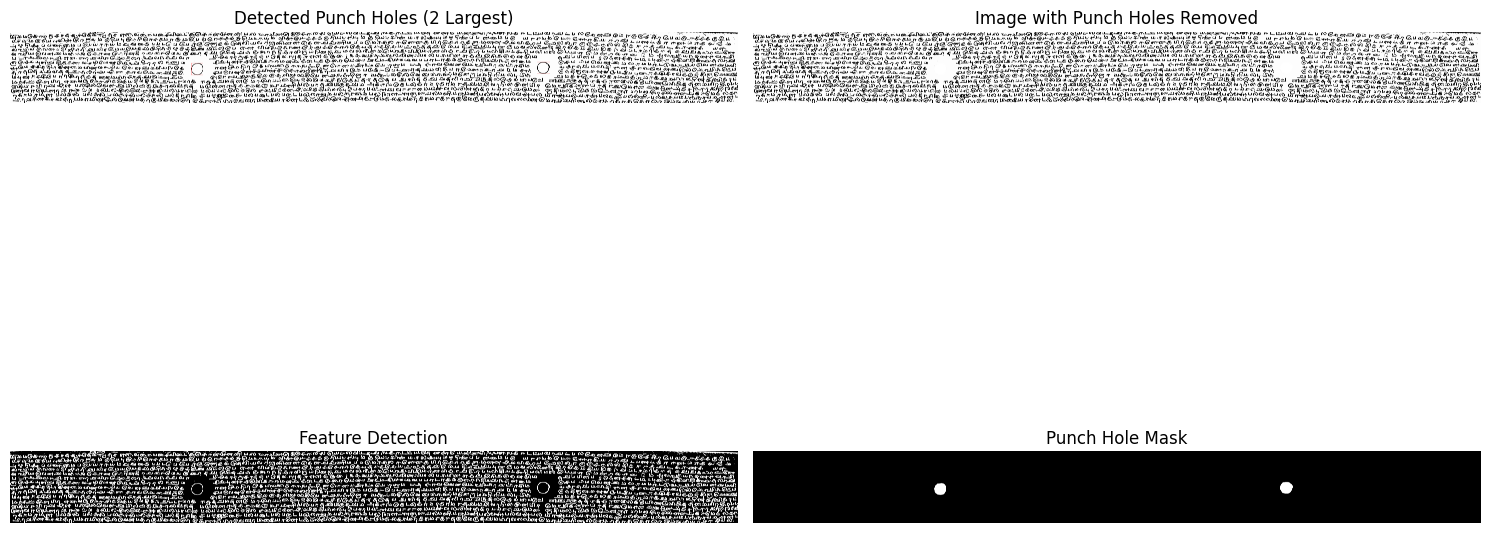

Found and removed the 2 largest punch holes
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\61\text_extraction\punch_hole_removal_top2\61.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(r"C:\Users\91948\Desktop\palmleaf_test\61\text_extraction\extracted_text.jpg")
original_img = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

is_dark_background = np.mean(gray) < 127
if is_dark_background:
    bg_color = 0  # Black
else:
    bg_color = 255  # White


if is_dark_background:
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
else:
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# multiple morphological operations applied for better segmentation
kernel_small = np.ones((3, 3), np.uint8)
kernel_medium = np.ones((5, 5), np.uint8)

# remove small noise
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_small)
# Connect broken parts
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_medium)

# Enhanced edge detection to detect arc segments
edges = cv2.Canny(gray, 50, 150)
dilated_edges = cv2.dilate(edges, kernel_small, iterations=1)

# Combine binary and edge features
combined = cv2.bitwise_or(closing, dilated_edges)

# contours in the combined image
contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def analyze_arc_features(contour):
    if len(contour) >= 5:
        try:
            ellipse = cv2.fitEllipse(contour)
            center, axes, angle = ellipse
            major_axis, minor_axis = axes

            axis_ratio = minor_axis / major_axis if major_axis > 0 else 0

            # Calculate arc length
            perimeter = cv2.arcLength(contour, False)
            full_ellipse_perimeter = np.pi * (3*(major_axis + minor_axis) -
                                             np.sqrt((3*major_axis + minor_axis) *
                                                    (major_axis + 3*minor_axis)))

            completeness = perimeter / full_ellipse_perimeter if full_ellipse_perimeter > 0 else 0

            return {
                'ellipse': ellipse,
                'axis_ratio': axis_ratio,
                'completeness': completeness,
                'perimeter': perimeter,
            }
        except:
            return None
    return None

punch_hole_candidates = []

# identifying potential punch holes
for contour in contours:
    
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    if perimeter == 0:
        continue

    # Calculate circularity = 4*pi*area/perimeter^2
    circularity = 4 * np.pi * area / (perimeter * perimeter)

    # Get boundary rectangle dimensions
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h if h > 0 else 0

    arc_features = analyze_arc_features(contour)

    min_punch_area = 200  
    #detecting punch holes:
    is_complete_hole = (
        area > min_punch_area and
        circularity > 0.5 and  
        0.5 < aspect_ratio < 2.0
    )

    is_broken_hole = False
    if arc_features:
        is_broken_hole = (
            area > min_punch_area and
            circularity > 0.3 and  # Lower circularity threshold for broken holes
            arc_features['axis_ratio'] > 0.4 and  # Still somewhat round
            0.3 < aspect_ratio < 3.0  # More lenient aspect ratio
        )

    edge_distance = min(x, img.shape[1] - (x + w))
    near_edge = edge_distance < img.shape[1] * 0.2  

    # confidence score (for being a punch hole)
    confidence = 0
    if is_complete_hole:
        confidence = circularity * area * 0.7  # Weight by area and circularity
        if near_edge:
            confidence *= 1.2  # Boost confidence if near edge
        punch_hole_candidates.append({
            'contour': contour,
            'area': area,
            'confidence': confidence,
            'is_broken': False,
            'x': x, 'y': y, 'w': w, 'h': h,
            'circularity': circularity,
            'aspect_ratio': aspect_ratio
        })
    elif is_broken_hole:
        confidence = circularity * area * 0.5  # Lower base confidence for broken holes
        if near_edge:
            confidence *= 1.2  # Boost confidence if near edge
        punch_hole_candidates.append({
            'contour': contour,
            'area': area,
            'confidence': confidence,
            'is_broken': True,
            'arc_features': arc_features,
            'x': x, 'y': y, 'w': w, 'h': h,
            'circularity': circularity,
            'aspect_ratio': aspect_ratio
        })

# Sort contours by area
punch_hole_candidates.sort(key=lambda x: x['area'], reverse=True)

punch_hole_mask = np.zeros_like(gray)

punch_holes_found = 0
top_candidates = punch_hole_candidates[:2]  # top 2 holes taken

for candidate in top_candidates:
    if candidate['is_broken']:
        # reconstruction of broken holes
        arc_features = candidate['arc_features']
        cv2.ellipse(punch_hole_mask, arc_features['ellipse'], 255, -1)
        cv2.ellipse(img, arc_features['ellipse'], (bg_color, bg_color, bg_color), -1)

        
        cv2.ellipse(original_img, arc_features['ellipse'], (0, 255, 0), 2)

        print(f"Broken punch hole detected: Area={candidate['area']}, Circularity={candidate['circularity']:.2f}, "
              f"Axis ratio={arc_features['axis_ratio']:.2f}")
    else:
        # contour drawn for complete holes
        cv2.drawContours(punch_hole_mask, [candidate['contour']], 0, 255, -1)
        cv2.drawContours(img, [candidate['contour']], 0, (bg_color, bg_color, bg_color), -1)

        x, y, w, h = candidate['x'], candidate['y'], candidate['w'], candidate['h']
        cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

        print(f"Complete punch hole detected: Area={candidate['area']}, Circularity={candidate['circularity']:.2f}, "
              f"Aspect ratio={candidate['aspect_ratio']:.2f}")

    punch_holes_found += 1


output_dir = r"C:\Users\91948\Desktop\palmleaf_test\61\text_extraction\punch_hole_removal_top2"
import os
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "61.jpg")
cv2.imwrite(output_path, img)

viz_path = os.path.join(output_dir, "punch_holes_detected.jpg")
cv2.imwrite(viz_path, original_img)

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Punch Holes (2 Largest)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with Punch Holes Removed")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(combined, cmap='gray')
plt.title("Feature Detection")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(punch_hole_mask, cmap='gray')
plt.title("Punch Hole Mask")
plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "punch_hole_removal_process.jpg"))
plt.show()

print(f"Found and removed the {punch_holes_found} largest punch holes")
print(f"Processed image saved to {output_path}")

Complete punch hole detected: Area=81281.5, Circularity=0.56, Aspect ratio=1.05
Complete punch hole detected: Area=80462.0, Circularity=0.61, Aspect ratio=1.08


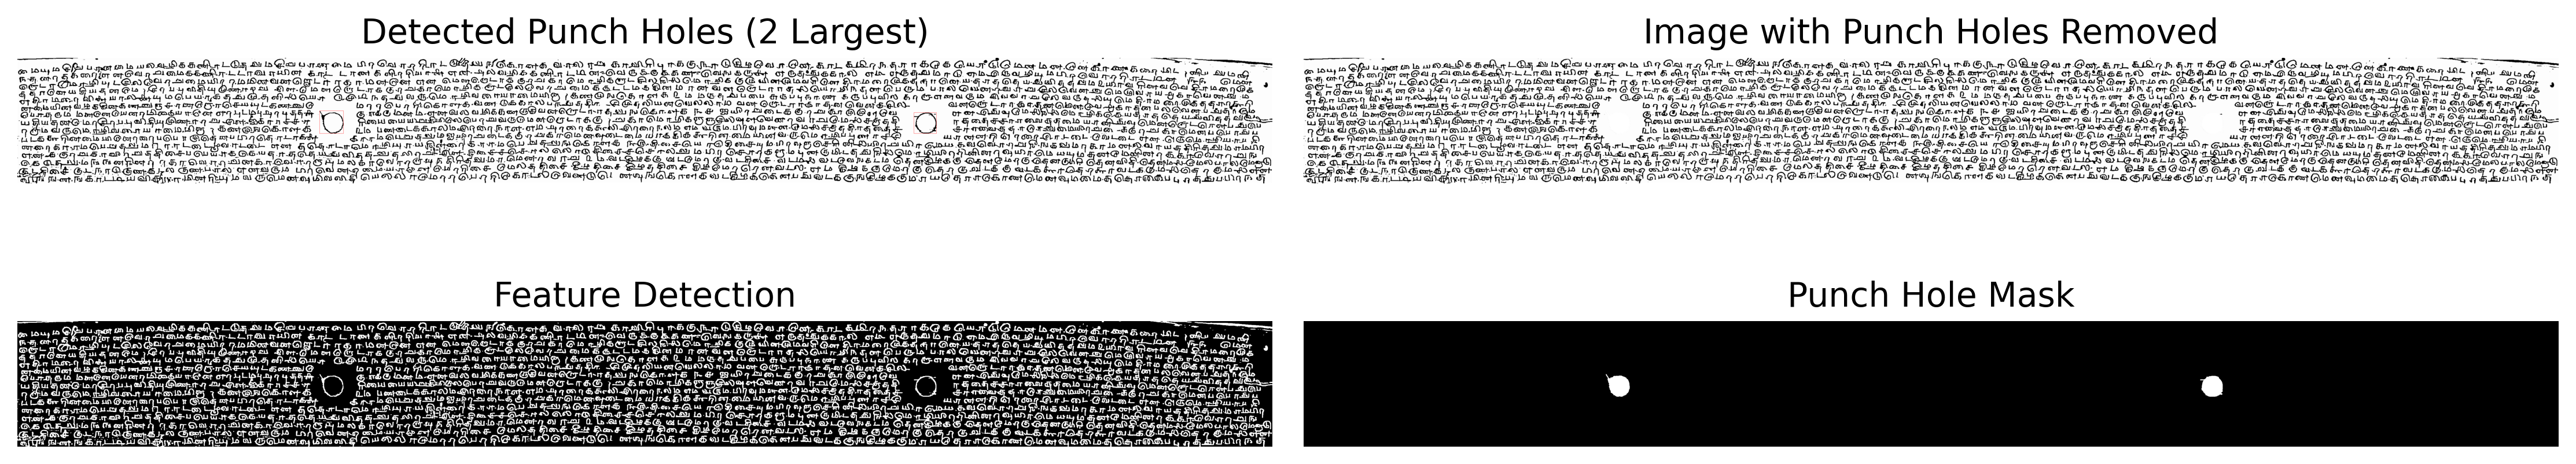

Found and removed the 2 largest punch holes
Processed image saved to C:\Users\91948\Desktop\66\text_extraction\punch_hole_removal_top2\66_.jpg


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread(r"C:\Users\91948\Desktop\66\66_extracted_fsrcnn_x4.jpg")
original_img = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

is_dark_background = np.mean(gray) < 127
if is_dark_background:
    bg_color = 0  # Black
else:
    bg_color = 255  # White


if is_dark_background:
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
else:
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# multiple morphological operations applied for better segmentation
kernel_small = np.ones((3, 3), np.uint8)
kernel_medium = np.ones((5, 5), np.uint8)

# remove small noise
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_small)
# Connect broken parts
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_medium)

# Enhanced edge detection to detect arc segments
edges = cv2.Canny(gray, 50, 150)
dilated_edges = cv2.dilate(edges, kernel_small, iterations=1)

# Combine binary and edge features
combined = cv2.bitwise_or(closing, dilated_edges)

# contours in the combined image
contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def analyze_arc_features(contour):
    if len(contour) >= 5:
        try:
            ellipse = cv2.fitEllipse(contour)
            center, axes, angle = ellipse
            major_axis, minor_axis = axes

            axis_ratio = minor_axis / major_axis if major_axis > 0 else 0

            # Calculate arc length
            perimeter = cv2.arcLength(contour, False)
            full_ellipse_perimeter = np.pi * (3*(major_axis + minor_axis) -
                                             np.sqrt((3*major_axis + minor_axis) *
                                                    (major_axis + 3*minor_axis)))

            completeness = perimeter / full_ellipse_perimeter if full_ellipse_perimeter > 0 else 0

            return {
                'ellipse': ellipse,
                'axis_ratio': axis_ratio,
                'completeness': completeness,
                'perimeter': perimeter,
            }
        except:
            return None
    return None

punch_hole_candidates = []

# identifying potential punch holes
for contour in contours:
    
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    if perimeter == 0:
        continue

    # Calculate circularity = 4*pi*area/perimeter^2
    circularity = 4 * np.pi * area / (perimeter * perimeter)

    # Get boundary rectangle dimensions
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h if h > 0 else 0

    arc_features = analyze_arc_features(contour)

    min_punch_area = 200  
    #detecting punch holes:
    is_complete_hole = (
        area > min_punch_area and
        circularity > 0.5 and  
        0.5 < aspect_ratio < 2.0
    )

    is_broken_hole = False
    if arc_features:
        is_broken_hole = (
            area > min_punch_area and
            circularity > 0.3 and  # Lower circularity threshold for broken holes
            arc_features['axis_ratio'] > 0.4 and  # Still somewhat round
            0.3 < aspect_ratio < 3.0  # More lenient aspect ratio
        )

    edge_distance = min(x, img.shape[1] - (x + w))
    near_edge = edge_distance < img.shape[1] * 0.2  

    # confidence score (for being a punch hole)
    confidence = 0
    if is_complete_hole:
        confidence = circularity * area * 0.7  # Weight by area and circularity
        if near_edge:
            confidence *= 1.2  # Boost confidence if near edge
        punch_hole_candidates.append({
            'contour': contour,
            'area': area,
            'confidence': confidence,
            'is_broken': False,
            'x': x, 'y': y, 'w': w, 'h': h,
            'circularity': circularity,
            'aspect_ratio': aspect_ratio
        })
    elif is_broken_hole:
        confidence = circularity * area * 0.5  # Lower base confidence for broken holes
        if near_edge:
            confidence *= 1.2  # Boost confidence if near edge
        punch_hole_candidates.append({
            'contour': contour,
            'area': area,
            'confidence': confidence,
            'is_broken': True,
            'arc_features': arc_features,
            'x': x, 'y': y, 'w': w, 'h': h,
            'circularity': circularity,
            'aspect_ratio': aspect_ratio
        })

# Sort contours by area
punch_hole_candidates.sort(key=lambda x: x['area'], reverse=True)

punch_hole_mask = np.zeros_like(gray)

punch_holes_found = 0
top_candidates = punch_hole_candidates[:2]  # top 2 holes taken

for candidate in top_candidates:
    if candidate['is_broken']:
        # reconstruction of broken holes
        arc_features = candidate['arc_features']
        cv2.ellipse(punch_hole_mask, arc_features['ellipse'], 255, -1)
        cv2.ellipse(img, arc_features['ellipse'], (bg_color, bg_color, bg_color), -1)

        
        cv2.ellipse(original_img, arc_features['ellipse'], (0, 255, 0), 2)

        print(f"Broken punch hole detected: Area={candidate['area']}, Circularity={candidate['circularity']:.2f}, "
              f"Axis ratio={arc_features['axis_ratio']:.2f}")
    else:
        # contour drawn for complete holes
        cv2.drawContours(punch_hole_mask, [candidate['contour']], 0, 255, -1)
        cv2.drawContours(img, [candidate['contour']], 0, (bg_color, bg_color, bg_color), -1)

        x, y, w, h = candidate['x'], candidate['y'], candidate['w'], candidate['h']
        cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

        print(f"Complete punch hole detected: Area={candidate['area']}, Circularity={candidate['circularity']:.2f}, "
              f"Aspect ratio={candidate['aspect_ratio']:.2f}")

    punch_holes_found += 1


output_dir = r"C:\Users\91948\Desktop\66\text_extraction\punch_hole_removal_top2"
import os
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "66_.jpg")
cv2.imwrite(output_path, img)

viz_path = os.path.join(output_dir, "punch_holes_detected.jpg")
cv2.imwrite(viz_path, original_img)

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Punch Holes (2 Largest)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with Punch Holes Removed")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(combined, cmap='gray')
plt.title("Feature Detection")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(punch_hole_mask, cmap='gray')
plt.title("Punch Hole Mask")
plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "punch_hole_removal_process.jpg"))
plt.show()

print(f"Found and removed the {punch_holes_found} largest punch holes")
print(f"Processed image saved to {output_path}")

Number of green bounding boxes drawn: 1245


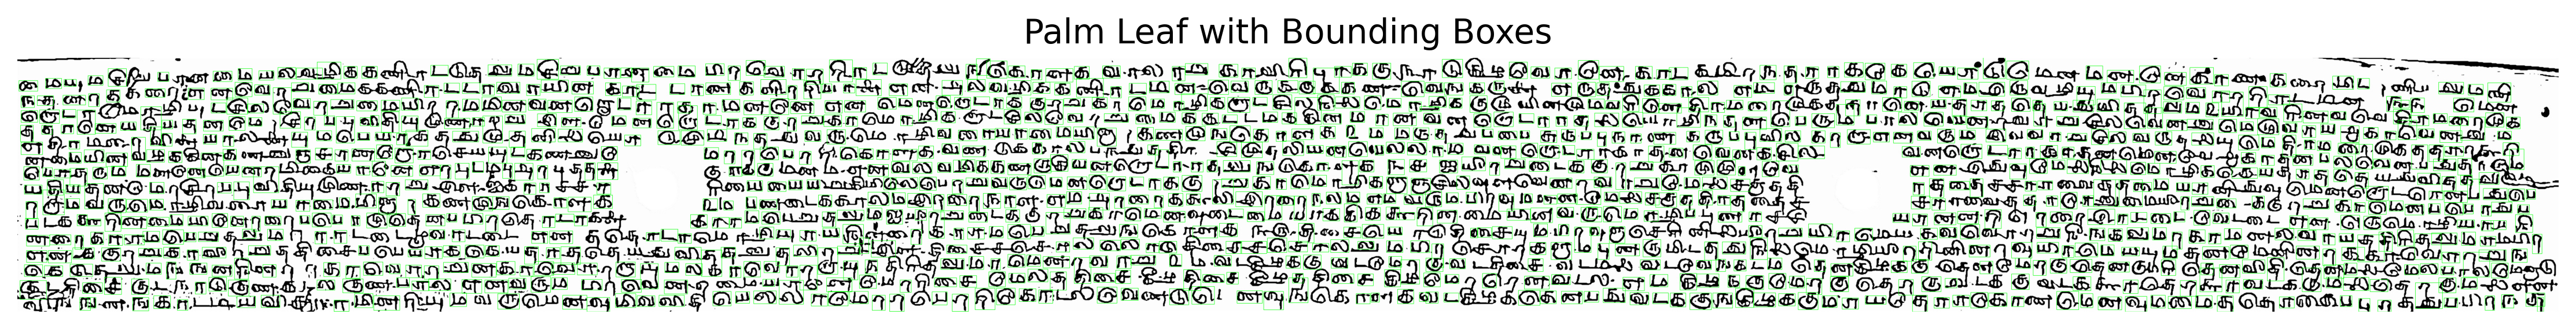

Image with bounding boxes saved to: C:\Users\91948\Desktop\66\text_extraction\punch_hole_removal_top2\boxed.jpg


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class PalmLeafCharacterDetector:
    def __init__(self):
        self.min_height = 30
        self.max_height = 200
        self.min_width = 30
        self.max_width = 200

    def preprocess_input_image(self, image_path):
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        return morphed_image

    def filter_components(self, binary_image):
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        filtered_binary = np.zeros_like(binary_image)
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:
                filtered_binary[labels == i] = 255
        return filtered_binary

    def draw_bounding_boxes(self, input_image, binary_image):
        output_image = input_image.copy()
        count = 0
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            if self.min_height <= h <= self.max_height and self.min_width <= w <= self.max_width:
                count += 1
                cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
        print(f"Number of green bounding boxes drawn: {count}")
        return output_image, count

    def process_palm_leaf(self, input_image_path, visualize=False):
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        refined_image = self.refine_segmentation(binary_image)
        filtered_image = self.filter_components(refined_image)
        boxed_image, num_boxes = self.draw_bounding_boxes(input_image, filtered_image)

        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
            plt.title("Palm Leaf with Bounding Boxes")
            plt.axis('off')
            plt.show()

        return boxed_image, num_boxes

def main():
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\66\text_extraction\punch_hole_removal_top2\66_.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\66\text_extraction\punch_hole_removal_top2\boxed.jpg"

    detector = PalmLeafCharacterDetector()
    boxed_image, num_boxes = detector.process_palm_leaf(INPUT_IMAGE_PATH, visualize=True)

    cv2.imwrite(OUTPUT_IMAGE_PATH, boxed_image)
    print(f"Image with bounding boxes saved to: {OUTPUT_IMAGE_PATH}")

if __name__ == "__main__":
    main()


Number of green bounding boxes drawn: 1003


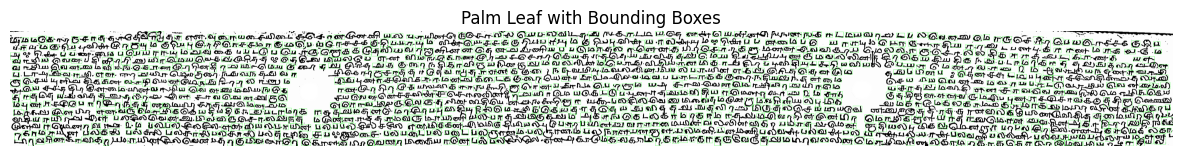

Image with bounding boxes saved to: C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\boxed.jpg


In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class PalmLeafCharacterDetector:
    def __init__(self):
        self.min_height = 30
        self.max_height = 200
        self.min_width = 30
        self.max_width = 200

    def preprocess_input_image(self, image_path):
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        return morphed_image

    def filter_components(self, binary_image):
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        filtered_binary = np.zeros_like(binary_image)
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:
                filtered_binary[labels == i] = 255
        return filtered_binary

    def draw_bounding_boxes(self, input_image, binary_image):
        output_image = input_image.copy()
        count = 0
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            if self.min_height <= h <= self.max_height and self.min_width <= w <= self.max_width:
                count += 1
                cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
        print(f"Number of green bounding boxes drawn: {count}")
        return output_image, count

    def process_palm_leaf(self, input_image_path, visualize=False):
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        refined_image = self.refine_segmentation(binary_image)
        filtered_image = self.filter_components(refined_image)
        boxed_image, num_boxes = self.draw_bounding_boxes(input_image, filtered_image)

        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
            plt.title("Palm Leaf with Bounding Boxes")
            plt.axis('off')
            plt.show()

        return boxed_image, num_boxes

def main():
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\61.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\boxed.jpg"

    detector = PalmLeafCharacterDetector()
    boxed_image, num_boxes = detector.process_palm_leaf(INPUT_IMAGE_PATH, visualize=True)

    cv2.imwrite(OUTPUT_IMAGE_PATH, boxed_image)
    print(f"Image with bounding boxes saved to: {OUTPUT_IMAGE_PATH}")

if __name__ == "__main__":
    main()


In [ ]:
import os
import glob
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from pathlib import Path

def augment_tamil_characters(input_folder, output_folder, num_samples_needed=100):
    
    os.makedirs(output_folder, exist_ok=True)
    
    
    image_paths = glob.glob(os.path.join(input_folder, "*.png")) + \
                  glob.glob(os.path.join(input_folder, "*.jpg")) + \
                  glob.glob(os.path.join(input_folder, "*.jpeg"))
    
    if not image_paths:
        print(f"No images found in {input_folder}")
        return
    
    print(f"Found {len(image_paths)} original images")
    

    num_augmentations_per_image = int(np.ceil((num_samples_needed - len(image_paths)) / len(image_paths)))
    
    if num_augmentations_per_image <= 0:
        print(f"You already have enough samples ({len(image_paths)})")
        return
    
    # Define very mild augmentation pipeline for Tamil characters
    # Carefully chosen to preserve character identity
    augmentation = iaa.Sequential([
        # Very mild spatial augmentations
        iaa.Affine(
            scale={"x": (0.95, 1.05), "y": (0.95, 1.05)},  # Reduced scale variation
            translate_percent={"x": (-0.03, 0.03), "y": (-0.03, 0.03)},  # Reduced translation
            rotate=(-5, 5),  # Reduced rotation
            shear=(-3, 3),  # Reduced shear
            mode='constant',
            cval=255
        ),
        
        # Very mild brightness and contrast adjustments
        iaa.LinearContrast((0.9, 1.1)),  # Reduced contrast variation
        iaa.Multiply((0.95, 1.05)),  # Reduced brightness variation
    ])
    
    # Load and augment images
    count = 0
    for img_path in image_paths:
       
        img_filename = os.path.basename(img_path)
        original_out_path = os.path.join(output_folder, img_filename)
        
        if not os.path.exists(original_out_path):
            img = cv2.imread(img_path)
            if img is None:
                print(f"Could not read {img_path}")
                continue
                
            
            if len(img.shape) == 3 and img.shape[2] == 3:
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
                img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
            
            cv2.imwrite(original_out_path, img)
            count += 1
        
        for i in range(num_augmentations_per_image):
            
            if count >= num_samples_needed:
                break
                
            aug_img = augmentation(image=img)
            
            # Save augmented image
            aug_filename = f"{Path(img_filename).stem}_aug_{i}{Path(img_filename).suffix}"
            aug_path = os.path.join(output_folder, aug_filename)
            cv2.imwrite(aug_path, aug_img)
            
            count += 1
            
        if count >= num_samples_needed:
            break
    
    print(f"Generated a total of {count} images (original + augmented)")


if __name__ == "__main__":
    
    input_folder = r"C:\Users\91948\Desktop\new_model\input2\50"  
    output_folder = r"C:\Users\91948\Desktop\new_model\input2\50a"  
    num_samples = 200  
    
    print(f"Processing Tamil character images...")
    print(f"Input folder: {input_folder}")
    print(f"Output folder: {output_folder}")
    print(f"Target samples: {num_samples}")
    
    augment_tamil_characters(input_folder, output_folder, num_samples)
    
    print("Augmentation completed!")

Number of green bounding boxes drawn: 1020


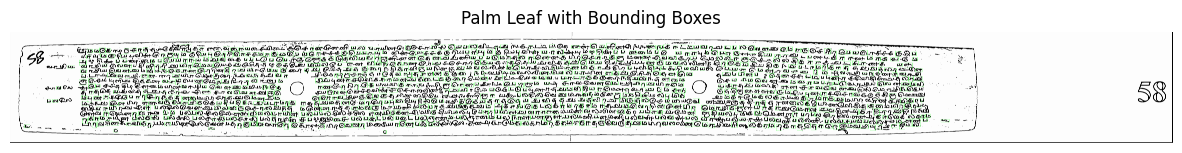

Image with bounding boxes saved to: C:\Users\91948\Desktop\palmleaf_test\61\boxed.jpg


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class PalmLeafCharacterDetector:
    def __init__(self):
        self.min_height = 30
        self.max_height = 170
        self.min_width = 30
        self.max_width = 170

    def preprocess_input_image(self, image_path):
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        return morphed_image

    def filter_components(self, binary_image):
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        filtered_binary = np.zeros_like(binary_image)
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:
                filtered_binary[labels == i] = 255
        return filtered_binary

    def draw_bounding_boxes(self, input_image, binary_image):
        output_image = input_image.copy()
        count = 0
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            if self.min_height <= h <= self.max_height and self.min_width <= w <= self.max_width:
                count += 1
                cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
        print(f"Number of green bounding boxes drawn: {count}")
        return output_image, count

    def process_palm_leaf(self, input_image_path, visualize=False):
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        refined_image = self.refine_segmentation(binary_image)
        filtered_image = self.filter_components(refined_image)
        boxed_image, num_boxes = self.draw_bounding_boxes(input_image, filtered_image)

        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
            plt.title("Palm Leaf with Bounding Boxes")
            plt.axis('off')
            plt.show()

        return boxed_image, num_boxes

def main():
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\boxed.jpg"

    detector = PalmLeafCharacterDetector()
    boxed_image, num_boxes = detector.process_palm_leaf(INPUT_IMAGE_PATH, visualize=True)

    cv2.imwrite(OUTPUT_IMAGE_PATH, boxed_image)
    print(f"Image with bounding boxes saved to: {OUTPUT_IMAGE_PATH}")

if __name__ == "__main__":
    main()


Number of green bounding boxes drawn: 1043
Saved 1043 contours to C:\Users\91948\Desktop\palmleaf_test\61\contours


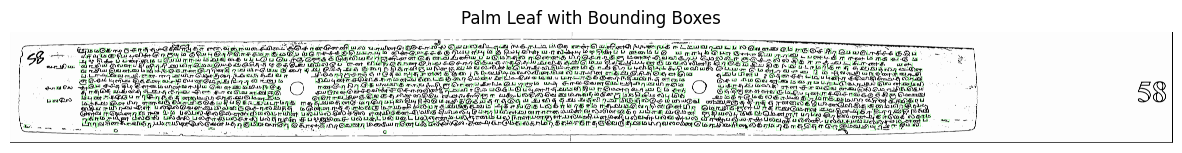

Image with bounding boxes saved to: C:\Users\91948\Desktop\palmleaf_test\61\boxed.jpg


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class PalmLeafCharacterDetector:
    def __init__(self):
        self.min_height = 0
        self.max_height = 200
        self.min_width = 0
        self.max_width = 210

    def preprocess(self, image_path):
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        return morphed_image

    def filter_components(self, binary_image):
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        filtered_binary = np.zeros_like(binary_image)
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:
                filtered_binary[labels == i] = 255
        return filtered_binary

    def draw_bounding_boxes(self, input_image, binary_image):
        output_image = input_image.copy()
        count = 0
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        valid_contours = []
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            if self.min_height <= h <= self.max_height and self.min_width <= w <= self.max_width:
                count += 1
                cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
                valid_contours.append((contour, x, y, w, h))

        print(f"Number of green bounding boxes drawn: {count}")
        return output_image, count, valid_contours

    def save_contours(self, input_image, valid_contours, output_dir):
        os.makedirs(output_dir, exist_ok=True)

        saved_count = 0
        for idx, (contour, x, y, w, h) in enumerate(valid_contours):
            # region corresponding to the contour extracted
            roi = input_image[y:y+h, x:x+w].copy()

            file_path = os.path.join(output_dir, f"contour_{idx}.png")

            cv2.imwrite(file_path, roi)
            saved_count += 1

        print(f"Saved {saved_count} contours to {output_dir}")
        return saved_count

    def process_palm_leaf(self, input_image_path, output_contours_dir=None, visualize=False):
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        refined_image = self.refine_segmentation(binary_image)
        filtered_image = self.filter_components(refined_image)
        boxed_image, num_boxes, valid_contours = self.draw_bounding_boxes(input_image, filtered_image)

        if output_contours_dir:
            self.save_contours(input_image, valid_contours, output_contours_dir)

        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
            plt.title("Palm Leaf with Bounding Boxes")
            plt.axis('off')
            plt.show()

        return boxed_image, num_boxes

def main():
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\boxed.jpg"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61\contours"

    detector = PalmLeafCharacterDetector()
    boxed_image, num_boxes = detector.process_palm_leaf(
        INPUT_IMAGE_PATH,
        output_contours_dir=CONTOURS_OUTPUT_DIR,
        visualize=True
    )

    cv2.imwrite(OUTPUT_IMAGE_PATH, boxed_image)
    print(f"Image with bounding boxes saved to: {OUTPUT_IMAGE_PATH}")

if __name__ == "__main__":
    main()

Number of green bounding boxes drawn: 1066
Saved 1066 contours to C:\Users\91948\Desktop\palmleaf_test\61_try\contours1


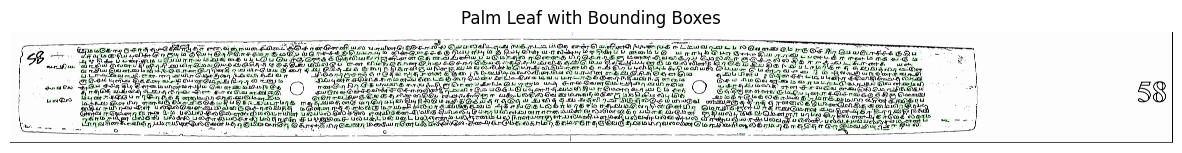

Image with bounding boxes saved to: C:\Users\91948\Desktop\palmleaf_test\61_try\boxed1.jpg


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class PalmLeafCharacterDetector:
    def __init__(self):
        self.min_height = 0
        self.max_height = 200
        self.min_width = 0
        self.max_width = 210

    def preprocess(self, image_path):
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        eroded = cv2.erode(binary_image, kernel, iterations=1)
        morphed_image = cv2.dilate(eroded, kernel, iterations=1)
        return morphed_image

    def filter_components(self, binary_image):
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        filtered_binary = np.zeros_like(binary_image)
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:
                filtered_binary[labels == i] = 255
        return filtered_binary

    def draw_bounding_boxes(self, input_image, binary_image):
        output_image = input_image.copy()
        count = 0
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        valid_contours = []
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            if self.min_height <= h <= self.max_height and self.min_width <= w <= self.max_width:
                count += 1
                cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
                valid_contours.append((contour, x, y, w, h))

        print(f"Number of green bounding boxes drawn: {count}")
        return output_image, count, valid_contours

    def save_contours(self, input_image, valid_contours, output_dir):
        os.makedirs(output_dir, exist_ok=True)

        saved_count = 0
        for idx, (contour, x, y, w, h) in enumerate(valid_contours):
            # region corresponding to the contour extracted
            roi = input_image[y:y+h, x:x+w].copy()

            file_path = os.path.join(output_dir, f"contour_{idx}.png")

            cv2.imwrite(file_path, roi)
            saved_count += 1

        print(f"Saved {saved_count} contours to {output_dir}")
        return saved_count

    def process_palm_leaf(self, input_image_path, output_contours_dir=None, visualize=False):
        input_image, binary_image = self.preprocess(input_image_path)
        refined_image = self.refine_segmentation(binary_image)
        filtered_image = self.filter_components(refined_image)
        boxed_image, num_boxes, valid_contours = self.draw_bounding_boxes(input_image, filtered_image)

        if output_contours_dir:
            self.save_contours(input_image, valid_contours, output_contours_dir)

        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
            plt.title("Palm Leaf with Bounding Boxes")
            plt.axis('off')
            plt.show()

        return boxed_image, num_boxes

def main():
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61_try\boxed1.jpg"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61_try\contours1"

    detector = PalmLeafCharacterDetector()
    boxed_image, num_boxes = detector.process_palm_leaf(
        INPUT_IMAGE_PATH,
        output_contours_dir=CONTOURS_OUTPUT_DIR,
        visualize=True
    )

    cv2.imwrite(OUTPUT_IMAGE_PATH, boxed_image)
    print(f"Image with bounding boxes saved to: {OUTPUT_IMAGE_PATH}")

if __name__ == "__main__":
    main()

Number of green bounding boxes drawn: 1834
Saved 1834 contours to C:\Users\91948\Desktop\palmleaf_test\61_try\contours


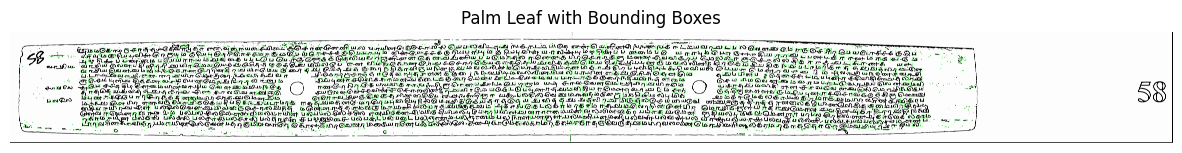

Image with bounding boxes saved to: C:\Users\91948\Desktop\palmleaf_test\61_try\boxed.jpg


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class PalmLeafCharacterDetector:
    def __init__(self):
        self.min_height = 0
        self.max_height = 200
        self.min_width = 0
        self.max_width = 210

    def preprocess(self, image_path):
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        inverted = cv2.bitwise_not(binary_image)
        eroded = cv2.erode(inverted, kernel, iterations=1)
        morphed_image = cv2.bitwise_not(eroded)
        return morphed_image

    def draw_bounding_boxes(self, input_image, binary_image):
        output_image = input_image.copy()
        count = 0
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        valid_contours = []
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            if self.min_height <= h <= self.max_height and self.min_width <= w <= self.max_width:
                count += 1
                cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
                valid_contours.append((contour, x, y, w, h))

        print(f"Number of green bounding boxes drawn: {count}")
        return output_image, count, valid_contours

    def save_contours(self, input_image, valid_contours, output_dir):
        os.makedirs(output_dir, exist_ok=True)

        saved_count = 0
        for idx, (contour, x, y, w, h) in enumerate(valid_contours):
            # region corresponding to the contour extracted
            roi = input_image[y:y+h, x:x+w].copy()

            file_path = os.path.join(output_dir, f"contour_{idx}.png")

            cv2.imwrite(file_path, roi)
            saved_count += 1

        print(f"Saved {saved_count} contours to {output_dir}")
        return saved_count

    def process_palm_leaf(self, input_image_path, output_contours_dir=None, visualize=False):
        input_image, binary_image = self.preprocess(input_image_path)
        refined_image = self.refine_segmentation(binary_image)
        boxed_image, num_boxes, valid_contours = self.draw_bounding_boxes(input_image, refined_image)

        if output_contours_dir:
            self.save_contours(input_image, valid_contours, output_contours_dir)

        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB))
            plt.title("Palm Leaf with Bounding Boxes")
            plt.axis('off')
            plt.show()

        return boxed_image, num_boxes

def main():
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61_try\boxed.jpg"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61_try\contours"

    detector = PalmLeafCharacterDetector()
    boxed_image, num_boxes = detector.process_palm_leaf(
        INPUT_IMAGE_PATH,
        output_contours_dir=CONTOURS_OUTPUT_DIR,
        visualize=True
    )

    cv2.imwrite(OUTPUT_IMAGE_PATH, boxed_image)
    print(f"Image with bounding boxes saved to: {OUTPUT_IMAGE_PATH}")

if __name__ == "__main__":
    main()

Using device: cpu
Loading dataset...
Detected 68 classes
Training set size: 9520
Validation set size: 2040
Testing set size: 2040
Starting training with evaluation on train and validation datasets only...
Epoch 1/10 completed in 54s
Train Loss: 1.8663, Train Acc: 0.5670
Val Loss: 0.8226, Val Acc: 0.7907
--------------------------------------------------
Epoch 2/10 completed in 37s
Train Loss: 0.6041, Train Acc: 0.8403
Val Loss: 0.4265, Val Acc: 0.8843
--------------------------------------------------
Epoch 3/10 completed in 36s
Train Loss: 0.4054, Train Acc: 0.8878
Val Loss: 0.3333, Val Acc: 0.9069
--------------------------------------------------
Epoch 4/10 completed in 37s
Train Loss: 0.3187, Train Acc: 0.9086
Val Loss: 0.3389, Val Acc: 0.8961
--------------------------------------------------
Epoch 5/10 completed in 37s
Train Loss: 0.2576, Train Acc: 0.9242
Val Loss: 0.2324, Val Acc: 0.9284
--------------------------------------------------
Epoch 6/10 completed in 36s
Train Loss: 

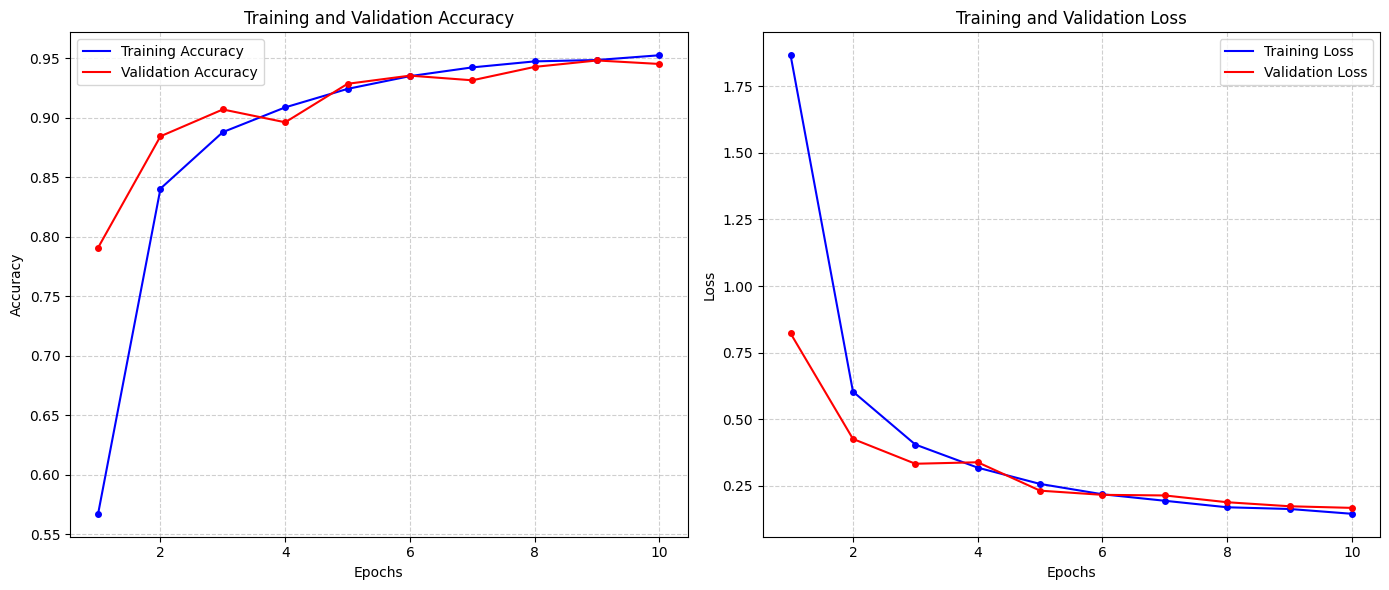


PERFORMING FINAL TEST DATASET EVALUATION
Final Test Loss: 0.1638
Final Test Accuracy: 95.29%

Class-wise Performance:
  1: 86.21% (25/29)
  10: 100.00% (37/37)
  11: 90.00% (27/30)
  12: 97.14% (34/35)
  13: 92.31% (24/26)
  14: 96.43% (27/28)
  15: 100.00% (36/36)
  16: 91.67% (22/24)
  17: 92.86% (26/28)
  18: 100.00% (29/29)
  19: 96.88% (31/32)
  2: 96.43% (27/28)
  20: 93.10% (27/29)
  21: 69.23% (27/39)
  22: 100.00% (36/36)
  23: 91.30% (21/23)
  24: 92.00% (23/25)
  25: 100.00% (35/35)
  26: 100.00% (29/29)
  27: 81.25% (26/32)
  28: 93.94% (31/33)
  29: 100.00% (32/32)
  3: 80.77% (21/26)
  30: 100.00% (27/27)
  31: 96.15% (25/26)
  32: 100.00% (29/29)
  33: 100.00% (40/40)
  34: 100.00% (33/33)
  35: 100.00% (36/36)
  36: 92.00% (23/25)
  37: 100.00% (24/24)
  38: 100.00% (41/41)
  39: 100.00% (31/31)
  4: 100.00% (34/34)
  40: 93.75% (15/16)
  41: 85.71% (18/21)
  42: 100.00% (24/24)
  43: 100.00% (29/29)
  44: 100.00% (29/29)
  45: 100.00% (22/22)
  46: 83.87% (26/31)
  47

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
import os
import numpy as np
from PIL import Image
import time
import json
import matplotlib.pyplot as plt

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=68):
        super(BetterCharRecognitionCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Adaptive pooling
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        # dropout to reduce overfitting
        self.dropout = nn.Dropout(0.15)
        
        # Fully connected layer
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
    
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x


class CharacterDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        
        self.samples = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        
        try:
            image = Image.open(img_path).convert('RGB')
            
            if self.transform:
                image = self.transform(image)
            
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            default_img = torch.zeros((3, 64, 64))
            return default_img, label

def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(data_loader.dataset)
    epoch_acc = running_corrects.double() / len(data_loader.dataset)
    
    return epoch_loss, epoch_acc.item()

def train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.to(device)
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        start_time = time.time()
        
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        
        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = running_corrects.double() / len(train_loader.dataset)
        
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        
        epoch_time = time.time() - start_time
        
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc.item())
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs} completed in {epoch_time:.0f}s')
        print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
        print('-' * 50)
    
    return model, history

def plot_metrics(history):
    epochs = range(1, len(history['train_loss']) + 1)
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], 'r-', label='Validation Accuracy')
    
    plt.plot(epochs, history['train_acc'], 'bo', markersize=4)
    plt.plot(epochs, history['val_acc'], 'ro', markersize=4)
    
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
    
    plt.plot(epochs, history['train_loss'], 'bo', markersize=4)
    plt.plot(epochs, history['val_loss'], 'ro', markersize=4)
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig('training_validation_metrics.png')
    plt.show()

#test evaluation
def final_test_evaluation(model, test_loader, criterion, device):
    
    print("\n" + "="*50)
    print("PERFORMING FINAL TEST DATASET EVALUATION")
    print("="*50)
    
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    all_preds = []
    all_labels = []
    
    class_correct = {}
    class_total = {}
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # loss
            test_loss += loss.item() * inputs.size(0)
            
            # accuracy
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Classwise accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = preds[i].item()
                
                if label not in class_total:
                    class_total[label] = 0
                    class_correct[label] = 0
                
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1
    
    #final metrics
    final_test_loss = test_loss / len(test_loader.dataset)
    final_test_accuracy = correct / total
    
    #per-class accuracy
    class_accuracy = {}
    for class_idx in class_total:
        class_accuracy[class_idx] = class_correct[class_idx] / class_total[class_idx]
    
    # Print results
    print(f"Final Test Loss: {final_test_loss:.4f}")
    print(f"Final Test Accuracy: {final_test_accuracy*100:.2f}%")
    print("\nClass-wise Performance:")
    
    try:
        if hasattr(test_loader.dataset, 'class_to_idx'):
            idx_to_class = {i: cls for cls, i in test_loader.dataset.class_to_idx.items()}
        elif hasattr(test_loader.dataset, 'dataset') and hasattr(test_loader.dataset.dataset, 'class_to_idx'):
            idx_to_class = {i: cls for cls, i in test_loader.dataset.dataset.class_to_idx.items()}
        else:
            idx_to_class = {i: f"Class {i}" for i in class_total.keys()}
    except:
        idx_to_class = {i: f"Class {i}" for i in class_total.keys()}
    
    # per-class performance
    for class_idx in sorted(class_total.keys()):
        class_name = idx_to_class.get(class_idx, f"Class {class_idx}")
        print(f"  {class_name}: {class_accuracy[class_idx]*100:.2f}% ({class_correct[class_idx]}/{class_total[class_idx]})")
    #results
    results = {
        'test_loss': final_test_loss,
        'test_accuracy': final_test_accuracy,
        'class_accuracy': class_accuracy,
        'class_correct': class_correct,
        'class_total': class_total,
        'all_predictions': all_preds,
        'all_labels': all_labels
    }
    
    return results

if __name__ == "__main__":
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    data_path = r"C:\Users\91948\Desktop\palmleaf_test\input"  
    
    print("Loading dataset...")
    full_dataset = CharacterDataset(root_dir=data_path, transform=transform)
    
    num_classes = len(full_dataset.classes)
    print(f"Detected {num_classes} classes")
    
    dataset_size = len(full_dataset)
    train_size = int(0.7 * dataset_size)
    val_size = int(0.15 * dataset_size)
    test_size = dataset_size - train_size - val_size
    
    train_dataset, val_dataset, test_dataset = random_split(
        full_dataset, 
        [train_size, val_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )
    
    print(f"Training set size: {len(train_dataset)}")
    print(f"Validation set size: {len(val_dataset)}")
    print(f"Testing set size: {len(test_dataset)}")
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
    
    model = BetterCharRecognitionCNN(num_classes=num_classes)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    print("Starting training with evaluation on train and validation datasets only...")
    trained_model, history = train_and_evaluate_model(
        model, 
        train_loader, 
        val_loader, 
        criterion, 
        optimizer, 
        num_epochs=10
    )
    
    plot_metrics(history)
    
    # test evaluation
    final_test_results = final_test_evaluation(trained_model, test_loader, criterion, device)
    
    # model saved(.pth)
    model_save_path = r"C:\Users\91948\Desktop\palmleaf_test\better1.pth"
    torch.save({
        'model_state_dict': trained_model.state_dict(),
        'num_classes': num_classes,
        'class_to_idx': full_dataset.class_to_idx,
        'training_history': history,
        'final_test_accuracy': final_test_results['test_accuracy'],
        'final_test_loss': final_test_results['test_loss'],
        'class_accuracy': final_test_results['class_accuracy']
    }, model_save_path)
    print(f"PyTorch model saved to {model_save_path}")
    
    idx_to_class = {i: cls for cls, i in full_dataset.class_to_idx.items()}
    class_indices = {
        'class_to_idx': full_dataset.class_to_idx,
        'idx_to_class': idx_to_class,
        'classes': full_dataset.classes
    }
    
    json_path = r"C:\Users\91948\Desktop\palmleaf_test\class_ind1.json"
    with open(json_path, 'w') as f:
        json.dump(class_indices, f, indent=4)
    print(f"Class indices saved to {json_path}")
    
    test_results_path = r"C:\Users\91948\Desktop\palmleaf_test\test_results1.json"
    with open(test_results_path, 'w') as f:
        serializable_results = {
            'test_loss': final_test_results['test_loss'],
            'test_accuracy': final_test_results['test_accuracy'],
            'class_accuracy': {str(k): v for k, v in final_test_results['class_accuracy'].items()},
            'class_correct': {str(k): int(v) for k, v in final_test_results['class_correct'].items()},
            'class_total': {str(k): int(v) for k, v in final_test_results['class_total'].items()}
        }
        json.dump(serializable_results, f, indent=4)
    print(f"Test results saved to {test_results_path}")
    
    print("\nModel training, validation, and testing completed!")

In [6]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import json
import cv2
from sklearn.metrics import precision_recall_fscore_support

class CNNWithTwoFCLayers(nn.Module):
    def __init__(self, num_classes=68, input_size=64):
        super(CNNWithTwoFCLayers, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Calculate the feature map size after convolutions and pooling
        # For input_size=64: 64 -> 32 (after pool1) -> 16 (after pool2)
        feature_size = input_size // 4  # After 2 pooling layers with stride 2
        flattened_features = 32 * feature_size * feature_size
        
        # Two fully connected layers with dropout
        self.dropout1 = nn.Dropout(0.15)
        self.fc1 = nn.Linear(flattened_features, 256)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.15)
        self.fc2 = nn.Linear(256, num_classes)
        
    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
    
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Flatten - no adaptive pooling needed
        x = x.view(x.size(0), -1)
        
        # First fully connected layer
        x = self.dropout1(x)
        x = self.fc1(x)
        x = self.relu3(x)
        
        # Second fully connected layer
        x = self.dropout2(x)
        x = self.fc2(x)
        
        return x


class PalmLeafClassifier:
    def __init__(self, model_path, class_indices_path):
        """
        Initialize the palm leaf classifier
        
        :param model_path: Path to the pre-trained PyTorch model (.pth)
        :param class_indices_path: Path to the class indices JSON file
        """
        # Set device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        # Load class indices
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  # Assume the whole file is class indices
            
        # Reverse the class indices dictionary
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        # Set image parameters
        self.IMG_SIZE = (64, 64)
        
        # Create transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        # Load model
        checkpoint = torch.load(model_path, map_location=self.device)
        
        # Determine number of classes
        num_classes = len(self.idx_to_class)
        
        # Initialize model architecture
        if isinstance(checkpoint, dict):
            # If saved as state dict
            if 'model_state_dict' in checkpoint:
                # Get classes from checkpoint if available
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                # The whole dict might be the state_dict
                state_dict = checkpoint
                
            self.model = CNNWithTwoFCLayers(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            # If saved as full model
            self.model = checkpoint
            
        # Set model to evaluation mode
        self.model.eval()
        
        print(f"Model loaded successfully, trained on {num_classes} classes")
    
    def preprocess_image(self, image_path):
        """
        Preprocess image for model prediction
        
        :param image_path: Path to the image file
        :return: Preprocessed image tensor
        """
        # Open image with PIL
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            # Return an empty tensor in case of error
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)
    
    def evaluate_directory(self, test_dir, output_file='classification_results.txt'):
        """
        Evaluate model performance on a directory of images
        
        :param test_dir: Directory containing subdirectories of classes
        :param output_file: Path to save the results
        :return: Dictionary of performance metrics
        """
        # Open file for writing results
        with open(output_file, 'w') as results_file:
            # Metrics tracking
            total_correct = 0
            total_images = 0
            true_labels = []
            predicted_labels = []
            
            # Dictionary to store per-class metrics
            per_class_metrics = {}
            
            # Write header to results file
            results_file.write("Palm Leaf Classification Results\n")
            results_file.write("================================\n\n")
            
            # Iterate through subdirectories
            for true_class in sorted(os.listdir(test_dir)):
                class_path = os.path.join(test_dir, true_class)
                
                # Skip if not a directory
                if not os.path.isdir(class_path):
                    continue
                
                # Track correct predictions for this class
                class_correct = 0
                class_total = 0
                class_true_labels = []
                class_predicted_labels = []
                
                # Write class header to results file
                results_file.write(f"\nClass: {true_class}\n")
                results_file.write("-" * (6 + len(true_class)) + "\n")
                
                # Iterate through images in the subdirectory
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    
                    # Check if it's an image file
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                        try:
                            # Preprocess image
                            img_tensor = self.preprocess_image(img_path)
                            
                            # Predict with PyTorch
                            with torch.no_grad():
                                output = self.model(img_tensor)
                                probabilities = torch.nn.functional.softmax(output, dim=1)
                                predicted_class_index = torch.argmax(probabilities, dim=1).item()
                                
                            # Get class name
                            predicted_class = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
                            
                            # Write prediction details to results file
                            results_file.write(f"Image: {img_name}, True Class: {true_class}, Predicted Class: {predicted_class}\n")
                            
                            # Track metrics
                            if predicted_class == true_class:
                                class_correct += 1
                                total_correct += 1
                            
                            # Track for sklearn metrics
                            true_labels.append(true_class)
                            predicted_labels.append(predicted_class)
                            class_true_labels.append(True)  # True class is always true
                            class_predicted_labels.append(predicted_class == true_class)
                            
                            class_total += 1
                            total_images += 1
                        
                        except Exception as e:
                            results_file.write(f"Error processing {img_path}: {e}\n")
                
                # Calculate per-class metrics
                if class_total > 0:
                    # Handle case with only one class
                    try:
                        precision, recall, f1, support = precision_recall_fscore_support(
                            class_true_labels, 
                            class_predicted_labels, 
                            average='binary'
                        )
                        
                        # Ensure we can handle both array and scalar results
                        precision = precision[0] if isinstance(precision, np.ndarray) else precision
                        recall = recall[0] if isinstance(recall, np.ndarray) else recall
                        f1 = f1[0] if isinstance(f1, np.ndarray) else f1
                        support = support[0] if isinstance(support, np.ndarray) else support
                    except Exception as e:
                        # Fallback calculations if precision_recall_fscore_support fails
                        precision = class_correct / class_total if any(class_predicted_labels) else 0
                        recall = class_correct / class_total if any(class_true_labels) else 0
                        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
                        support = class_total
                    
                    # Store per-class metrics
                    per_class_metrics[true_class] = {
                        'total_images': class_total,
                        'correct_predictions': class_correct,
                        'accuracy': class_correct / class_total,
                        'precision': precision,
                        'recall': recall,
                        'f1_score': f1,
                        'support': support
                    }
                    
                    # Write class-level metrics to results file
                    results_file.write(f"Total Images: {class_total}\n")
                    results_file.write(f"Correct Predictions: {class_correct}\n")
                    results_file.write(f"Class Accuracy: {class_correct/class_total:.2%}\n")
                    results_file.write(f"Precision: {precision:.4f}\n")
                    results_file.write(f"Recall: {recall:.4f}\n")
                    results_file.write(f"F1 Score: {f1:.4f}\n")
                    results_file.write(f"Support: {support}\n")
            
            # Calculate overall metrics
            overall_accuracy = total_correct / total_images if total_images > 0 else 0
            
            # Use unique labels to ensure all classes are considered
            unique_labels = list(set(true_labels))
            
            # Calculate precision, recall, and F1 score
            precision, recall, f1_score, _ = precision_recall_fscore_support(
                true_labels, 
                predicted_labels, 
                labels=unique_labels, 
                average='macro'
            )
            
            # Prepare results
            results = {
                'total_images': total_images,
                'total_correct': total_correct,
                'overall_accuracy': overall_accuracy,
                'macro_precision': precision,
                'macro_recall': recall,
                'macro_f1_score': f1_score,
                'per_class_metrics': per_class_metrics
            }
            
            # Write overall results to file
            results_file.write("\n\nOverall Results\n")
            results_file.write("===============\n")
            results_file.write(f"Total Images: {total_images}\n")
            results_file.write(f"Correct Predictions: {total_correct}\n")
            results_file.write(f"Overall Accuracy: {overall_accuracy:.2%}\n")
            results_file.write(f"Macro Precision: {precision:.4f}\n")
            results_file.write(f"Macro Recall: {recall:.4f}\n")
            results_file.write(f"Macro F1 Score: {f1_score:.4f}\n")
        
        return results

def main():
    # Replace with your actual paths
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\two_fc_model.pth"
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\ind.json"
    TEST_DIRECTORY = r"C:\Users\91948\Desktop\palmleaf_test\62\62_testdata"
    OUTPUT_FILE = r"C:\Users\91948\Desktop\palmleaf_test\62\classification_results_62.txt"
    
    # Initialize classifier
    classifier = PalmLeafClassifier(MODEL_PATH, CLASS_INDICES_PATH)
    
    # Evaluate directory and save results to file
    results = classifier.evaluate_directory(TEST_DIRECTORY, OUTPUT_FILE)
    
    # Print confirmation message
    print(f"Classification results have been saved to {OUTPUT_FILE}")

if __name__ == "__main__":
    main()

Using device: cpu


C:\Users\91948\AppData\Local\Temp\ipykernel_31836\2395497022.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devi

Model loaded successfully, trained on 68 classes


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification results have been saved to C:\Users\91948\Desktop\palmleaf_test\62\classification_results_62.txt


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using device: cpu
Model loaded successfully, trained on 68 classes


C:\Users\91948\AppData\Local\Temp\ipykernel_23048\3715836319.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devic

Contour 5 - Predicted: 53 (Confidence: 0.52), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\53\53_1.png
Contour 7 - Predicted: 19 (Confidence: 0.85), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\19\19_1.png
Contour 8 - Predicted: 62 (Confidence: 0.89), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\62\62_1.png
Contour 9 - Predicted: 20 (Confidence: 0.99), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\20\20_1.png
Contour 10 - Predicted: 32 (Confidence: 0.99), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\32\32_1.png
Contour 11 - Predicted: 6 (Confidence: 1.00), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\6\6_1.png
Contour 12 - Predicted: 20 (Confidence: 0.96), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\20\20_2.png
Contour 13 - Predicted: 4 (Confidence: 0.87), Saved to C:\Users\91948\Desktop\palmleaf_test\61\61_testdata\4\4_1.png
Contour 14 - Predicted: 6 (Confidence: 0.72), Save

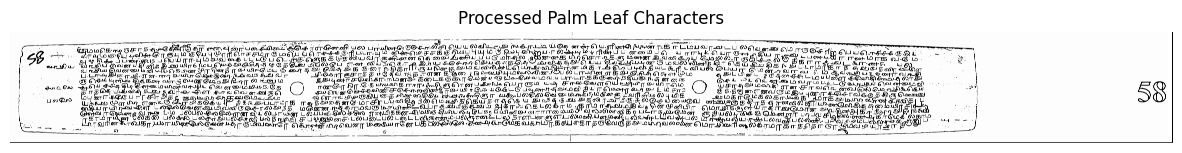


Number of characters replaced: 1020
Total characters extracted: 1020
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\61\processed61.png
Extracted characters organized by class in C:\Users\91948\Desktop\palmleaf_test\61\61_testdata


In [19]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile


class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
       
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        
        self.dropout = nn.Dropout(0.15)
        
        # Fully connected layer
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Adaptive pooling
        x = self.adaptive_pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Dropout
        x = self.dropout(x)
        
        # Fully connected layer
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
      
        # Set device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        # Load class indices
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
       
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        
        kernel = np.ones((3, 3), np.uint8)
        
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        
        return morphed_image

    def filter_components(self, binary_image):
        
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        
        filtered_binary = np.zeros_like(binary_image)
        
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:  
                filtered_binary[labels == i] = 255
        
        return filtered_binary

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
      
        output_image = input_image.copy()
        
        # Dictionary to store the count of characters saved in each class folder
        class_counts = {}
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            # bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
                character = input_image[y:y+h, x:x+w]
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # Create directory for this class if it doesn't exist
                    class_dir = os.path.join(self.output_dir, predicted_class)
                    os.makedirs(class_dir, exist_ok=True)
                    
                    # Update count for this class
                    if predicted_class not in class_counts:
                        class_counts[predicted_class] = 0
                    class_counts[predicted_class] += 1
                    
                    # Save the character image in its class directory
                    char_filename = f"{predicted_class}_{class_counts[predicted_class]}.png"
                    char_path = os.path.join(class_dir, char_filename)
                    cv2.imwrite(char_path, character)
                    
                    # Process replacement with ground truth if available
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                    
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f}), Saved to {char_path}")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                finally:
                    os.unlink(temp_path)
        
        # Print summary
        print("\nCharacter Extraction Summary:")
        for cls, count in class_counts.items():
            print(f"Class {cls}: {count} characters extracted")
        
        return output_image, replaced_characters_count, class_counts

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        filtered_image = self.filter_components(refined_image)

        processed_image, num_replaced, class_counts = self.extract_and_replace_characters(
            input_image, filtered_image,
            min_height=30, max_height=200,
            min_width=30, max_width=200
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced, class_counts

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better1.pth" 
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind1.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\processed61.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61\61_testdata"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

    processed_image, num_replaced, class_counts = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"\nNumber of characters replaced: {num_replaced}")
    print(f"Total characters extracted: {sum(class_counts.values())}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted characters organized by class in {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

In [20]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import json
import cv2
from sklearn.metrics import precision_recall_fscore_support

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=68):
        super(BetterCharRecognitionCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Adaptive pooling
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        # dropout to reduce overfitting
        self.dropout = nn.Dropout(0.15)
        
        # Fully connected layer
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
    
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x


class PalmLeafClassifier:
    def __init__(self, model_path, class_indices_path):
        """
        Initialize the palm leaf classifier
        
        :param model_path: Path to the pre-trained PyTorch model (.pth)
        :param class_indices_path: Path to the class indices JSON file
        """
        # Set device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        # Load class indices
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  # Assume the whole file is class indices
            
        # Reverse the class indices dictionary
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        # Set image parameters
        self.IMG_SIZE = (64, 64)
        
        # Create transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        # Load model
        checkpoint = torch.load(model_path, map_location=self.device)
        
        # Determine number of classes
        num_classes = len(self.idx_to_class)
        
        # Initialize model architecture
        if isinstance(checkpoint, dict):
            # If saved as state dict
            if 'model_state_dict' in checkpoint:
                # Get classes from checkpoint if available
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                # The whole dict might be the state_dict
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            # If saved as full model
            self.model = checkpoint
            
        # Set model to evaluation mode
        self.model.eval()
        
        print(f"Model loaded successfully, trained on {num_classes} classes")
    
    def preprocess_image(self, image_path):
        """
        Preprocess image for model prediction
        
        :param image_path: Path to the image file
        :return: Preprocessed image tensor
        """
        # Open image with PIL
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            # Return an empty tensor in case of error
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)
    
    def evaluate_directory(self, test_dir, output_file='classification_results.txt'):
        """
        Evaluate model performance on a directory of images
        
        :param test_dir: Directory containing subdirectories of classes
        :param output_file: Path to save the results
        :return: Dictionary of performance metrics
        """
        # Open file for writing results
        with open(output_file, 'w') as results_file:
            # Metrics tracking
            total_correct = 0
            total_images = 0
            true_labels = []
            predicted_labels = []
            
            # Dictionary to store per-class metrics
            per_class_metrics = {}
            
            # Write header to results file
            results_file.write("Palm Leaf Classification Results\n")
            results_file.write("================================\n\n")
            
            # Iterate through subdirectories
            for true_class in sorted(os.listdir(test_dir)):
                class_path = os.path.join(test_dir, true_class)
                
                # Skip if not a directory
                if not os.path.isdir(class_path):
                    continue
                
                # Track correct predictions for this class
                class_correct = 0
                class_total = 0
                class_true_labels = []
                class_predicted_labels = []
                
                # Write class header to results file
                results_file.write(f"\nClass: {true_class}\n")
                results_file.write("-" * (6 + len(true_class)) + "\n")
                
                # Iterate through images in the subdirectory
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    
                    # Check if it's an image file
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                        try:
                            # Preprocess image
                            img_tensor = self.preprocess_image(img_path)
                            
                            # Predict with PyTorch
                            with torch.no_grad():
                                output = self.model(img_tensor)
                                probabilities = torch.nn.functional.softmax(output, dim=1)
                                predicted_class_index = torch.argmax(probabilities, dim=1).item()
                                
                            # Get class name
                            predicted_class = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
                            
                            # Write prediction details to results file
                            results_file.write(f"Image: {img_name}, True Class: {true_class}, Predicted Class: {predicted_class}\n")
                            
                            # Track metrics
                            if predicted_class == true_class:
                                class_correct += 1
                                total_correct += 1
                            
                            # Track for sklearn metrics
                            true_labels.append(true_class)
                            predicted_labels.append(predicted_class)
                            class_true_labels.append(True)  # True class is always true
                            class_predicted_labels.append(predicted_class == true_class)
                            
                            class_total += 1
                            total_images += 1
                        
                        except Exception as e:
                            results_file.write(f"Error processing {img_path}: {e}\n")
                
                # Calculate per-class metrics
                if class_total > 0:
                    # Handle case with only one class
                    try:
                        precision, recall, f1, support = precision_recall_fscore_support(
                            class_true_labels, 
                            class_predicted_labels, 
                            average='binary'
                        )
                        
                        # Ensure we can handle both array and scalar results
                        precision = precision[0] if isinstance(precision, np.ndarray) else precision
                        recall = recall[0] if isinstance(recall, np.ndarray) else recall
                        f1 = f1[0] if isinstance(f1, np.ndarray) else f1
                        support = support[0] if isinstance(support, np.ndarray) else support
                    except Exception as e:
                        # Fallback calculations if precision_recall_fscore_support fails
                        precision = class_correct / class_total if any(class_predicted_labels) else 0
                        recall = class_correct / class_total if any(class_true_labels) else 0
                        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
                        support = class_total
                    
                    # Store per-class metrics
                    per_class_metrics[true_class] = {
                        'total_images': class_total,
                        'correct_predictions': class_correct,
                        'accuracy': class_correct / class_total,
                        'precision': precision,
                        'recall': recall,
                        'f1_score': f1,
                        'support': support
                    }
                    
                    # Write class-level metrics to results file
                    results_file.write(f"Total Images: {class_total}\n")
                    results_file.write(f"Correct Predictions: {class_correct}\n")
                    results_file.write(f"Class Accuracy: {class_correct/class_total:.2%}\n")
                    results_file.write(f"Precision: {precision:.4f}\n")
                    results_file.write(f"Recall: {recall:.4f}\n")
                    results_file.write(f"F1 Score: {f1:.4f}\n")
                    results_file.write(f"Support: {support}\n")
            
            # Calculate overall metrics
            overall_accuracy = total_correct / total_images if total_images > 0 else 0
            
            # Use unique labels to ensure all classes are considered
            unique_labels = list(set(true_labels))
            
            # Calculate precision, recall, and F1 score
            precision, recall, f1_score, _ = precision_recall_fscore_support(
                true_labels, 
                predicted_labels, 
                labels=unique_labels, 
                average='macro'
            )
            
            # Prepare results
            results = {
                'total_images': total_images,
                'total_correct': total_correct,
                'overall_accuracy': overall_accuracy,
                'macro_precision': precision,
                'macro_recall': recall,
                'macro_f1_score': f1_score,
                'per_class_metrics': per_class_metrics
            }
            
            # Write overall results to file
            results_file.write("\n\nOverall Results\n")
            results_file.write("===============\n")
            results_file.write(f"Total Images: {total_images}\n")
            results_file.write(f"Correct Predictions: {total_correct}\n")
            results_file.write(f"Overall Accuracy: {overall_accuracy:.2%}\n")
            results_file.write(f"Macro Precision: {precision:.4f}\n")
            results_file.write(f"Macro Recall: {recall:.4f}\n")
            results_file.write(f"Macro F1 Score: {f1_score:.4f}\n")
        
        return results

def main():
    # Replace with your actual paths
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better1.pth"
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind1.json"
    TEST_DIRECTORY = r"C:\Users\91948\Desktop\palmleaf_test\61\61_testdata"
    OUTPUT_FILE = r"C:\Users\91948\Desktop\palmleaf_test\61\classification_results61.txt"
    
    # Initialize classifier
    classifier = PalmLeafClassifier(MODEL_PATH, CLASS_INDICES_PATH)
    
    # Evaluate directory and save results to file
    results = classifier.evaluate_directory(TEST_DIRECTORY, OUTPUT_FILE)
    
    # Print confirmation message
    print(f"Classification results have been saved to {OUTPUT_FILE}")

if __name__ == "__main__":
    main()

Using device: cpu
Model loaded successfully, trained on 68 classes


C:\Users\91948\AppData\Local\Temp\ipykernel_23048\1128630608.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devic

Classification results have been saved to C:\Users\91948\Desktop\palmleaf_test\61\classification_results61.txt


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
import os
import numpy as np
from PIL import Image
import time
import json
import matplotlib.pyplot as plt

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Adaptive pooling
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        # dropout to reduce overfitting
        self.dropout = nn.Dropout(0.15)
        
        # Fully connected layer
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
    
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x


class CharacterDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        
        self.samples = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        
        try:
            image = Image.open(img_path).convert('RGB')
            
            if self.transform:
                image = self.transform(image)
            
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            default_img = torch.zeros((3, 64, 64))
            return default_img, label

def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(data_loader.dataset)
    epoch_acc = running_corrects.double() / len(data_loader.dataset)
    
    return epoch_loss, epoch_acc.item()

def train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.to(device)
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        start_time = time.time()
        
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        
        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = running_corrects.double() / len(train_loader.dataset)
        
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)
        
        epoch_time = time.time() - start_time
        
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc.item())
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs} completed in {epoch_time:.0f}s')
        print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
        print('-' * 50)
    
    return model, history

def plot_metrics(history):
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Create accuracy plot and save to PDF
    plt.figure(figsize=(10, 8))
    
    plt.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy', linewidth=2)
    plt.plot(epochs, history['val_acc'], 'r-', label='Validation Accuracy', linewidth=2)
    
    plt.plot(epochs, history['train_acc'], 'bo', markersize=6)
    plt.plot(epochs, history['val_acc'], 'ro', markersize=6)
    
    plt.title('Training and Validation Accuracy', fontsize=16, pad=20)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Center the plot and add more padding for better appearance
    plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)
    
    # Add accuracy values as text annotations
    for i, (train_acc, val_acc) in enumerate(zip(history['train_acc'], history['val_acc'])):
        epoch_num = i + 1
        if epoch_num % 2 == 0:  # Add text for every other epoch to avoid clutter
            plt.annotate(f'{train_acc:.3f}', (epoch_num, train_acc), 
                        textcoords="offset points", xytext=(0,10), 
                        ha='center', fontsize=8, color='blue')
            plt.annotate(f'{val_acc:.3f}', (epoch_num, val_acc), 
                        textcoords="offset points", xytext=(0,-15), 
                        ha='center', fontsize=8, color='red')
    
    # Save the accuracy plot as PDF
    plt.savefig('accuracy_vs_epoch.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Create loss plot and save to PDF
    plt.figure(figsize=(10, 8))
    
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss', linewidth=2)
    plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    
    plt.plot(epochs, history['train_loss'], 'bo', markersize=6)
    plt.plot(epochs, history['val_loss'], 'ro', markersize=6)
    
    plt.title('Training and Validation Loss', fontsize=16, pad=20)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Center the plot and add more padding for better appearance
    plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)
    
    # Add loss values as text annotations
    for i, (train_loss, val_loss) in enumerate(zip(history['train_loss'], history['val_loss'])):
        epoch_num = i + 1
        if epoch_num % 2 == 0:  # Add text for every other epoch to avoid clutter
            plt.annotate(f'{train_loss:.3f}', (epoch_num, train_loss), 
                        textcoords="offset points", xytext=(0,10), 
                        ha='center', fontsize=8, color='blue')
            plt.annotate(f'{val_loss:.3f}', (epoch_num, val_loss), 
                        textcoords="offset points", xytext=(0,-15), 
                        ha='center', fontsize=8, color='red')
    
    # Save the loss plot as PDF
    plt.savefig('loss_vs_epoch.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Also create the combined plot as before (optional)
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], 'r-', label='Validation Accuracy')
    plt.plot(epochs, history['train_acc'], 'bo', markersize=4)
    plt.plot(epochs, history['val_acc'], 'ro', markersize=4)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
    plt.plot(epochs, history['train_loss'], 'bo', markersize=4)
    plt.plot(epochs, history['val_loss'], 'ro', markersize=4)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig('training_validation_metrics.png')
    plt.close()
    
    print("Plots saved as 'accuracy_vs_epoch.pdf', 'loss_vs_epoch.pdf', and 'training_validation_metrics.png'")

def final_test_evaluation(model, test_loader, criterion, device):
    
    print("\n" + "="*50)
    print("PERFORMING FINAL TEST DATASET EVALUATION")
    print("="*50)
    
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    all_preds = []
    all_labels = []
    
    class_correct = {}
    class_total = {}
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # loss
            test_loss += loss.item() * inputs.size(0)
            
            # accuracy
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Classwise accuracy
            for i in range(len(labels)):
                label = labels[i].item()
                pred = preds[i].item()
                
                if label not in class_total:
                    class_total[label] = 0
                    class_correct[label] = 0
                
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1
    
    #final metrics
    final_test_loss = test_loss / len(test_loader.dataset)
    final_test_accuracy = correct / total
    
    #per-class accuracy
    class_accuracy = {}
    for class_idx in class_total:
        class_accuracy[class_idx] = class_correct[class_idx] / class_total[class_idx]
    
    # Print results
    print(f"Final Test Loss: {final_test_loss:.4f}")
    print(f"Final Test Accuracy: {final_test_accuracy*100:.2f}%")
    print("\nClass-wise Performance:")
    
    try:
        if hasattr(test_loader.dataset, 'class_to_idx'):
            idx_to_class = {i: cls for cls, i in test_loader.dataset.class_to_idx.items()}
        elif hasattr(test_loader.dataset, 'dataset') and hasattr(test_loader.dataset.dataset, 'class_to_idx'):
            idx_to_class = {i: cls for cls, i in test_loader.dataset.dataset.class_to_idx.items()}
        else:
            idx_to_class = {i: f"Class {i}" for i in class_total.keys()}
    except:
        idx_to_class = {i: f"Class {i}" for i in class_total.keys()}
    
    # per-class performance
    for class_idx in sorted(class_total.keys()):
        class_name = idx_to_class.get(class_idx, f"Class {class_idx}")
        print(f"  {class_name}: {class_accuracy[class_idx]*100:.2f}% ({class_correct[class_idx]}/{class_total[class_idx]})")
    #results
    results = {
        'test_loss': final_test_loss,
        'test_accuracy': final_test_accuracy,
        'class_accuracy': class_accuracy,
        'class_correct': class_correct,
        'class_total': class_total,
        'all_predictions': all_preds,
        'all_labels': all_labels
    }
    
    return results

if __name__ == "__main__":
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    data_path = r"C:\Users\91948\Desktop\new_model\seenu\input2"  
    
    print("Loading dataset...")
    full_dataset = CharacterDataset(root_dir=data_path, transform=transform)
    
    num_classes = len(full_dataset.classes)
    print(f"Detected {num_classes} classes")
    
    dataset_size = len(full_dataset)
    train_size = int(0.7 * dataset_size)
    val_size = int(0.15 * dataset_size)
    test_size = dataset_size - train_size - val_size
    
    train_dataset, val_dataset, test_dataset = random_split(
        full_dataset, 
        [train_size, val_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )
    
    print(f"Training set size: {len(train_dataset)}")
    print(f"Validation set size: {len(val_dataset)}")
    print(f"Testing set size: {len(test_dataset)}")
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
    
    model = BetterCharRecognitionCNN(num_classes=num_classes)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    print("Starting training with evaluation on train and validation datasets only...")
    trained_model, history = train_and_evaluate_model(
        model, 
        train_loader, 
        val_loader, 
        criterion, 
        optimizer, 
        num_epochs=10
    )
    
    plot_metrics(history)
    
    # test evaluation
    final_test_results = final_test_evaluation(trained_model, test_loader, criterion, device)
    
    # model saved(.pth)
    model_save_path = r"C:\Users\91948\Desktop\new_model\seenu\better.pth"
    torch.save({
        'model_state_dict': trained_model.state_dict(),
        'num_classes': num_classes,
        'class_to_idx': full_dataset.class_to_idx,
        'training_history': history,
        'final_test_accuracy': final_test_results['test_accuracy'],
        'final_test_loss': final_test_results['test_loss'],
        'class_accuracy': final_test_results['class_accuracy']
    }, model_save_path)
    print(f"PyTorch model saved to {model_save_path}")
    
    idx_to_class = {i: cls for cls, i in full_dataset.class_to_idx.items()}
    class_indices = {
        'class_to_idx': full_dataset.class_to_idx,
        'idx_to_class': idx_to_class,
        'classes': full_dataset.classes
    }
    
    json_path = r"C:\Users\91948\Desktop\new_model\seenu\class_ind.json"
    with open(json_path, 'w') as f:
        json.dump(class_indices, f, indent=4)
    print(f"Class indices saved to {json_path}")
    
    test_results_path = r"C:\Users\91948\Desktop\palmleaf_test\test_results1.json"
    with open(test_results_path, 'w') as f:
        serializable_results = {
            'test_loss': final_test_results['test_loss'],
            'test_accuracy': final_test_results['test_accuracy'],
            'class_accuracy': {str(k): v for k, v in final_test_results['class_accuracy'].items()},
            'class_correct': {str(k): int(v) for k, v in final_test_results['class_correct'].items()},
            'class_total': {str(k): int(v) for k, v in final_test_results['class_total'].items()}
        }
        json.dump(serializable_results, f, indent=4)
    print(f"Test results saved to {test_results_path}")
    
    print("\nModel training, validation, and testing completed!")

Using device: cpu
Loading dataset...
Detected 69 classes
Training set size: 9660
Validation set size: 2070
Testing set size: 2070
Starting training with evaluation on train and validation datasets only...
Epoch 1/10 completed in 254s
Train Loss: 1.8375, Train Acc: 0.5856
Val Loss: 0.7113, Val Acc: 0.8126
--------------------------------------------------
Epoch 2/10 completed in 43s
Train Loss: 0.5338, Train Acc: 0.8600
Val Loss: 0.4154, Val Acc: 0.8874
--------------------------------------------------
Epoch 3/10 completed in 37s
Train Loss: 0.3592, Train Acc: 0.9003
Val Loss: 0.3138, Val Acc: 0.9082
--------------------------------------------------
Epoch 4/10 completed in 36s
Train Loss: 0.2771, Train Acc: 0.9181
Val Loss: 0.2800, Val Acc: 0.9198
--------------------------------------------------
Epoch 5/10 completed in 36s
Train Loss: 0.2327, Train Acc: 0.9285
Val Loss: 0.2432, Val Acc: 0.9319
--------------------------------------------------
Epoch 6/10 completed in 36s
Train Loss:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    precision_recall_curve, average_precision_score,
    roc_curve, auc, roc_auc_score
)
from itertools import cycle
import json


class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        self.dropout = nn.Dropout(0.15)
        
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x


class CharacterDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        
        self.samples = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        
        try:
            image = Image.open(img_path).convert('RGB')
            
            if self.transform:
                image = self.transform(image)
            
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            default_img = torch.zeros((3, 64, 64))
            return default_img, label

# Evaluation function from the training code
def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(data_loader.dataset)
    epoch_acc = running_corrects.double() / len(data_loader.dataset)
    
    return epoch_loss, epoch_acc.item()

BASE_DIR = r"C:\Users\91948\Desktop\new_model\seenu"
MODEL_PATH = os.path.join(BASE_DIR, "better.pth")  
data_dir = os.path.join(BASE_DIR, "input2")
CLASS_INDICES_PATH = os.path.join(BASE_DIR, "class_ind.json") 


IMG_SIZE = (64, 64)
BATCH_SIZE = 32

try:
    with open(CLASS_INDICES_PATH, 'r') as f:
        class_indices = json.load(f)
    class_names = class_indices.get('classes', [])
    num_classes = len(class_names)
    print(f"Loaded {num_classes} classes from {CLASS_INDICES_PATH}")
except FileNotFoundError:
    print(f"Class indices file not found at {CLASS_INDICES_PATH}")
    

transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


full_dataset = CharacterDataset(
    root_dir=data_dir, 
    transform=transform
)


if not class_names:
    class_names = full_dataset.classes
    num_classes = len(class_names)
    print(f"Detected {num_classes} classes from dataset")

# Split dataset 
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, 
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)  # For reproducibility - same seed as training
)

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Testing set size: {len(test_dataset)}")


train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


checkpoint = torch.load(MODEL_PATH, map_location=device)

if isinstance(checkpoint, dict):
    if 'model_state_dict' in checkpoint:
        num_classes = checkpoint.get('num_classes', num_classes)
        state_dict = checkpoint['model_state_dict']
        
        if 'final_test_accuracy' in checkpoint:
            print(f"Model saved with test accuracy: {checkpoint['final_test_accuracy']*100:.2f}%")
    else:
        state_dict = checkpoint
    
    model = BetterCharRecognitionCNN(num_classes=num_classes).to(device)
    model.load_state_dict(state_dict)
else:
    model = checkpoint

model.eval()  
print("Model loaded successfully")


criterion = nn.CrossEntropyLoss()

train_loss, train_acc = evaluate(model, train_loader, criterion, device)
val_loss, val_acc = evaluate(model, val_loader, criterion, device)
test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")

# true labels and predictions FROM TEST DATA
y_true = []
y_pred_prob = []

with torch.no_grad():
    for inputs, labels in test_loader:  
        inputs = inputs.to(device)
        outputs = model(inputs)
        probabilities = nn.functional.softmax(outputs, dim=1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred_prob.extend(probabilities.cpu().numpy())


y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true_onehot = np.zeros((len(y_true), num_classes))
for i, label in enumerate(y_true):
    y_true_onehot[i, label] = 1

# 1. Precision-Recall Curve for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_onehot[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_true_onehot[:, i], y_pred_prob[:, i])

# Calculate micro-average precision-recall curve and AP score
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_true_onehot.ravel(), y_pred_prob.ravel()
)
average_precision["micro"] = average_precision_score(
    y_true_onehot.ravel(), y_pred_prob.ravel(), average="micro"
)

# Setup plot details
colors = cycle(['blue', 'red', 'green', 'navy', 'turquoise', 'darkorange',
               'cornflowerblue', 'teal', 'purple', 'pink'])

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(12, 10))
plt.plot(recall["micro"], precision["micro"], color='gold', lw=4,
         label=f'Micro-average (area = {average_precision["micro"]:.2f})')

# Plot Precision-Recall curves for a subset of classes for readability
# Select top and bottom classes by average precision
ap_values = [(i, avg_p) for i, avg_p in average_precision.items() 
             if isinstance(i, int)]  
ap_values.sort(key=lambda x: x[1])

num_to_select = min(5, num_classes // 2)
selected_classes = [idx for idx, _ in ap_values[:num_to_select] + ap_values[-num_to_select:]]

for i, color in zip(selected_classes, colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{class_names[i]} (AP={average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Test Data)')  # Updated title to reflect test data
plt.legend(loc="best")
plt.grid(True)
plt.savefig(os.path.join(BASE_DIR, "precision_recall_curve_test.png"), dpi=300)
print(f" Precision-Recall curve saved to {os.path.join(BASE_DIR, 'precision_recall_curve_test.png')}")
plt.close()

# 2. ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(12, 10))

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)


for i, color in zip(selected_classes, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - Test Data')  # Updated title
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(BASE_DIR, "roc_curve_test.png"), dpi=300)
print(f"ROC curve saved to {os.path.join(BASE_DIR, 'roc_curve_test.png')}")
plt.close()

# 3. AUC Scores Visualization
# Calculate AUC for each class
auc_scores = [roc_auc[i] for i in range(num_classes)]

# Create a bar chart of AUC scores
plt.figure(figsize=(14, 10))
sorted_indices = np.argsort(auc_scores)
plt.bar(np.arange(len(class_names)), [auc_scores[i] for i in sorted_indices], color='skyblue')
plt.xlabel('Class')
plt.ylabel('AUC Score')
plt.title('AUC Scores by Class - Test Data')  # Updated title
plt.xticks(np.arange(len(class_names)), [class_names[i] for i in sorted_indices], rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, "auc_scores_test.png"), dpi=300)
print(f" AUC scores chart saved to {os.path.join(BASE_DIR, 'auc_scores_test.png')}")
plt.close()

# 4. Confusion Matrix Visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Data')  # Updated title
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, "confusion_matrix_test.png"), dpi=300)
print(f" Confusion matrix saved to {os.path.join(BASE_DIR, 'confusion_matrix_test.png')}")
plt.close()

# 5. Calculate and print global metrics
# Classification report
print("\nClassification Report (Test Data):")  # Updated to reflect test data
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate macro and weighted average AUC
try:
    # For multiclass AUC, use OvR (One-vs-Rest) strategy
    macro_roc_auc = roc_auc_score(y_true_onehot, y_pred_prob, average='macro', multi_class='ovr')
    weighted_roc_auc = roc_auc_score(y_true_onehot, y_pred_prob, average='weighted', multi_class='ovr')
    
    print(f"\nMacro-average ROC AUC: {macro_roc_auc:.4f}")
    print(f"Weighted-average ROC AUC: {weighted_roc_auc:.4f}")
    print(f"Micro-average ROC AUC: {roc_auc['micro']:.4f}")
    
except ValueError as e:
    print(f"Note: Could not calculate global AUC metrics - {e}")
    print("This may happen if some classes don't have samples in the test set.")
    
# Additional: Calculate and print mean Average Precision
mean_ap = np.mean([avg_p for i, avg_p in average_precision.items() if isinstance(i, int)])
print(f"Mean Average Precision (mAP): {mean_ap:.4f}")
print(f"Macro-average Precision: {np.mean([average_precision[i] for i in range(num_classes)]):.4f}")

Loaded 69 classes from C:\Users\91948\Desktop\new_model\seenu\class_ind.json
Training set size: 9660
Validation set size: 2070
Testing set size: 2070
Using device: cpu
Model saved with test accuracy: 94.40%
Model loaded successfully


C:\Users\91948\AppData\Local\Temp\ipykernel_14420\3390508104.py:180: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(MODEL_PATH, map_location=device)


Training Loss: 0.0908
Training Accuracy: 97.22%
Validation Loss: 0.1904
Validation Accuracy: 94.40%
Test Loss: 0.1856
Test Accuracy: 94.40%
 Precision-Recall curve saved to C:\Users\91948\Desktop\new_model\seenu\precision_recall_curve_test.png
ROC curve saved to C:\Users\91948\Desktop\new_model\seenu\roc_curve_test.png
 AUC scores chart saved to C:\Users\91948\Desktop\new_model\seenu\auc_scores_test.png
 Confusion matrix saved to C:\Users\91948\Desktop\new_model\seenu\confusion_matrix_test.png

Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.93      0.97      0.95        29
          10       1.00      1.00      1.00        32
          11       0.95      0.68      0.79        28
          12       0.81      0.89      0.85        38
          13       0.86      0.86      0.86        35
          14       1.00      0.97      0.98        31
          15       0.82      1.00      0.90        33
          16       0.96      0.9

In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import numpy as np
import seaborn as sns
from itertools import cycle

# Function to create a PDF with all plots
def save_plots_to_pdf(base_dir, metrics_data):
    """
    Save all evaluation plots to a single PDF file
    
    Parameters:
    - base_dir: Base directory to save the PDF
    - metrics_data: Dictionary containing all metrics data needed for plots
    """
    pdf_path = os.path.join(base_dir, "model_evaluation_results.pdf")
    
    with PdfPages(pdf_path) as pdf:
        # Setup global plot style
        plt.rcParams.update({
            'font.size': 12,
            'axes.titlesize': 14,
            'axes.labelsize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'legend.fontsize': 10,
            'figure.figsize': (8.5, 11),  # Standard letter size
            'figure.dpi': 300,
            'figure.autolayout': True
        })
        
        # 1. Precision-Recall Curve
        fig = plt.figure(figsize=(8.5, 8))
        plt.plot(
            metrics_data['recall']["micro"], 
            metrics_data['precision']["micro"], 
            color='gold', 
            lw=3,
            label=f'Micro-average (area = {metrics_data["average_precision"]["micro"]:.2f})'
        )
        
        # Plot Precision-Recall curves for selected classes
        colors = cycle(['blue', 'red', 'green', 'navy', 'turquoise', 'darkorange',
                      'cornflowerblue', 'teal', 'purple', 'pink'])
        
        for i, color in zip(metrics_data['selected_classes'], colors):
            plt.plot(
                metrics_data['recall'][i], 
                metrics_data['precision'][i], 
                color=color, 
                lw=2,
                label=f'{metrics_data["class_names"][i]} (AP={metrics_data["average_precision"][i]:.2f})'
            )
        
        plt.xlabel('Recall', fontweight='bold')
        plt.ylabel('Precision', fontweight='bold')
        plt.title('Precision-Recall Curves (Test Data)', fontweight='bold', pad=20)
        plt.legend(loc="best")
        plt.grid(True, alpha=0.3)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
        # 2. ROC Curve
        fig = plt.figure(figsize=(8.5, 8))
        plt.plot(
            metrics_data['fpr']["micro"], 
            metrics_data['tpr']["micro"],
            label=f'Micro-average ROC (area = {metrics_data["roc_auc"]["micro"]:.2f})',
            color='deeppink', 
            linestyle=':', 
            linewidth=3
        )
        
        for i, color in zip(metrics_data['selected_classes'], colors):
            plt.plot(
                metrics_data['fpr'][i], 
                metrics_data['tpr'][i], 
                color=color, 
                lw=2,
                label=f'{metrics_data["class_names"][i]} (AUC = {metrics_data["roc_auc"][i]:.2f})'
            )
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontweight='bold')
        plt.ylabel('True Positive Rate', fontweight='bold')
        plt.title('Receiver Operating Characteristic (ROC) Curves - Test Data', fontweight='bold', pad=20)
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
        # 3. AUC Scores Visualization
        fig = plt.figure(figsize=(8.5, 8))
        sorted_indices = np.argsort(metrics_data['auc_scores'])
        bars = plt.bar(
            np.arange(len(metrics_data['class_names'])), 
            [metrics_data['auc_scores'][i] for i in sorted_indices],
            color='skyblue', 
            alpha=0.8
        )
        
        # Add values on top of bars
        for bar in bars:
            height = bar.get_height()
            if height > 0.7:  # Only add text if bar is tall enough
                plt.text(
                    bar.get_x() + bar.get_width() / 2.,
                    height - 0.05,
                    f'{height:.2f}',
                    ha='center', 
                    va='top', 
                    fontsize=8, 
                    fontweight='bold',
                    color='navy'
                )
                
        plt.xlabel('Class', fontweight='bold')
        plt.ylabel('AUC Score', fontweight='bold')
        plt.title('AUC Scores by Class - Test Data', fontweight='bold', pad=20)
        plt.xticks(
            np.arange(len(metrics_data['class_names'])), 
            [metrics_data['class_names'][i] for i in sorted_indices], 
            rotation=90, 
            fontsize=8
        )
        plt.ylim([0, 1.05])
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
        # 4. Confusion Matrix Visualization
        fig = plt.figure(figsize=(8.5, 8))
        sns.heatmap(
            metrics_data['cm'], 
            annot=False, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=metrics_data['class_names'], 
            yticklabels=metrics_data['class_names'],
            cbar_kws={'label': 'Count'}
        )
        plt.xlabel('Predicted Label', fontweight='bold')
        plt.ylabel('True Label', fontweight='bold')
        plt.title('Confusion Matrix - Test Data', fontweight='bold', pad=20)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
        # 5. Summary Metrics Page
        fig = plt.figure(figsize=(8.5, 8))
        plt.axis('off')
        plt.text(0.5, 0.95, 'Model Performance Summary', fontsize=16, fontweight='bold', ha='center')
        
        metrics_text = (
            f"Test Accuracy: {metrics_data['test_acc']*100:.2f}%\n\n"
            f"Mean Average Precision (mAP): {metrics_data['mean_ap']:.4f}\n\n"
            f"Macro-average ROC AUC: {metrics_data['macro_roc_auc']:.4f}\n\n"
            f"Weighted-average ROC AUC: {metrics_data['weighted_roc_auc']:.4f}\n\n"
            f"Micro-average ROC AUC: {metrics_data['roc_auc']['micro']:.4f}\n\n"
        )
        
        plt.text(0.5, 0.6, metrics_text, fontsize=12, ha='center', va='top')
        
        # Add model information
        plt.text(0.5, 0.3, 'Model: BetterCharRecognitionCNN', fontsize=12, fontweight='bold', ha='center')
        plt.text(0.5, 0.25, f'Number of Classes: {len(metrics_data["class_names"])}', fontsize=12, ha='center')
        
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
    print(f"All plots saved to PDF: {pdf_path}")
    return pdf_path

# Insert this at the end of your evaluation script
if __name__ == "__main__":
    # Collect all metrics data
    metrics_data = {
        'precision': precision,
        'recall': recall,
        'average_precision': average_precision,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'auc_scores': auc_scores,
        'cm': cm,
        'selected_classes': selected_classes,
        'class_names': class_names,
        'test_acc': test_acc,
        'mean_ap': mean_ap,
        'macro_roc_auc': macro_roc_auc,
        'weighted_roc_auc': weighted_roc_auc
    }
    
    # Save to PDF
    save_plots_to_pdf(BASE_DIR, metrics_data)

All plots saved to PDF: C:\Users\91948\Desktop\new_model\seenu\model_evaluation_results.pdf


In [3]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import numpy as np
import seaborn as sns
from itertools import cycle

def save_plots_to_pdf(base_dir, metrics_data):
    """
    Save all evaluation plots to a single PDF file
    
    Parameters:
    - base_dir: Base directory to save the PDF
    - metrics_data: Dictionary containing all metrics data needed for plots
    """
    pdf_path = os.path.join(base_dir, "model_evaluation_results.pdf")
    
    with PdfPages(pdf_path) as pdf:
        # Setup global plot style
        plt.rcParams.update({
            'font.size': 12,
            'axes.titlesize': 14,
            'axes.labelsize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'legend.fontsize': 10,
            'figure.figsize': (8.5, 11),  # Standard letter size
            'figure.dpi': 300,
            'figure.autolayout': True
        })
        
        # 1. Precision-Recall Curve - WITH FIX FOR AXIS RANGE
        fig = plt.figure(figsize=(8.5, 8))
        
        # Determine max x value needed to show full curves
        max_recall = 0
        for i in metrics_data['selected_classes']:
            if len(metrics_data['recall'][i]) > 0:
                max_recall = max(max_recall, np.max(metrics_data['recall'][i]))
        
        # Add some margin to ensure we don't cut anything off
        max_recall = min(max_recall * 1.05, 1.0)
        
        plt.plot(
            metrics_data['recall']["micro"], 
            metrics_data['precision']["micro"], 
            color='gold', 
            lw=3,
            label=f'Micro-average (area = {metrics_data["average_precision"]["micro"]:.2f})'
        )
        
        # Plot Precision-Recall curves for selected classes
        colors = cycle(['blue', 'red', 'green', 'navy', 'turquoise', 'darkorange',
                      'cornflowerblue', 'teal', 'purple', 'pink'])
        
        for i, color in zip(metrics_data['selected_classes'], colors):
            plt.plot(
                metrics_data['recall'][i], 
                metrics_data['precision'][i], 
                color=color, 
                lw=2,
                label=f'{metrics_data["class_names"][i]} (AP={metrics_data["average_precision"][i]:.2f})'
            )
        
        plt.xlabel('Recall', fontweight='bold')
        plt.ylabel('Precision', fontweight='bold')
        plt.title('Precision-Recall Curves (Test Data)', fontweight='bold', pad=20)
        plt.legend(loc="best")
        plt.grid(True, alpha=0.3)
        
        # Fix: Ensure the x-axis extends enough to show complete curves
        plt.xlim([-0.01, 1.02])  # Slightly expanded range
        plt.ylim([0.0, 1.05])
        
        # Add grid lines at 0.1 intervals for better readability
        plt.gca().set_xticks(np.arange(0, 1.1, 0.1))
        plt.gca().set_yticks(np.arange(0, 1.1, 0.1))
        
        plt.tight_layout(pad=1.0)  # Add some padding
        pdf.savefig(fig)
        plt.close()
        
        # Rest of the code remains the same...
        # 2. ROC Curve
        fig = plt.figure(figsize=(8.5, 8))
        plt.plot(
            metrics_data['fpr']["micro"], 
            metrics_data['tpr']["micro"],
            label=f'Micro-average ROC (area = {metrics_data["roc_auc"]["micro"]:.2f})',
            color='deeppink', 
            linestyle=':', 
            linewidth=3
        )
        
        for i, color in zip(metrics_data['selected_classes'], colors):
            plt.plot(
                metrics_data['fpr'][i], 
                metrics_data['tpr'][i], 
                color=color, 
                lw=2,
                label=f'{metrics_data["class_names"][i]} (AUC = {metrics_data["roc_auc"][i]:.2f})'
            )
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([-0.01, 1.02])  # Slightly expanded range for consistency
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontweight='bold')
        plt.ylabel('True Positive Rate', fontweight='bold')
        plt.title('Receiver Operating Characteristic (ROC) Curves - Test Data', fontweight='bold', pad=20)
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        
        # Add grid lines at 0.1 intervals
        plt.gca().set_xticks(np.arange(0, 1.1, 0.1))
        plt.gca().set_yticks(np.arange(0, 1.1, 0.1))
        
        plt.tight_layout(pad=1.0)
        pdf.savefig(fig)
        plt.close()
        
        # 3. AUC Scores Visualization
        fig = plt.figure(figsize=(8.5, 8))
        sorted_indices = np.argsort(metrics_data['auc_scores'])
        bars = plt.bar(
            np.arange(len(metrics_data['class_names'])), 
            [metrics_data['auc_scores'][i] for i in sorted_indices],
            color='skyblue', 
            alpha=0.8
        )
        
        # Add values on top of bars
        for bar in bars:
            height = bar.get_height()
            if height > 0.7:  # Only add text if bar is tall enough
                plt.text(
                    bar.get_x() + bar.get_width() / 2.,
                    height - 0.05,
                    f'{height:.2f}',
                    ha='center', 
                    va='top', 
                    fontsize=8, 
                    fontweight='bold',
                    color='navy'
                )
                
        plt.xlabel('Class', fontweight='bold')
        plt.ylabel('AUC Score', fontweight='bold')
        plt.title('AUC Scores by Class - Test Data', fontweight='bold', pad=20)
        plt.xticks(
            np.arange(len(metrics_data['class_names'])), 
            [metrics_data['class_names'][i] for i in sorted_indices], 
            rotation=90, 
            fontsize=8
        )
        plt.ylim([0, 1.05])
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
        # 4. Confusion Matrix Visualization
        fig = plt.figure(figsize=(8.5, 8))
        sns.heatmap(
            metrics_data['cm'], 
            annot=False, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=metrics_data['class_names'], 
            yticklabels=metrics_data['class_names'],
            cbar_kws={'label': 'Count'}
        )
        plt.xlabel('Predicted Label', fontweight='bold')
        plt.ylabel('True Label', fontweight='bold')
        plt.title('Confusion Matrix - Test Data', fontweight='bold', pad=20)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
        # 5. Summary Metrics Page
        fig = plt.figure(figsize=(8.5, 8))
        plt.axis('off')
        plt.text(0.5, 0.95, 'Model Performance Summary', fontsize=16, fontweight='bold', ha='center')
        
        metrics_text = (
            f"Test Accuracy: {metrics_data['test_acc']*100:.2f}%\n\n"
            f"Mean Average Precision (mAP): {metrics_data['mean_ap']:.4f}\n\n"
            f"Macro-average ROC AUC: {metrics_data['macro_roc_auc']:.4f}\n\n"
            f"Weighted-average ROC AUC: {metrics_data['weighted_roc_auc']:.4f}\n\n"
            f"Micro-average ROC AUC: {metrics_data['roc_auc']['micro']:.4f}\n\n"
        )
        
        plt.text(0.5, 0.6, metrics_text, fontsize=12, ha='center', va='top')
        
        # Add model information
        plt.text(0.5, 0.3, 'Model: BetterCharRecognitionCNN', fontsize=12, fontweight='bold', ha='center')
        plt.text(0.5, 0.25, f'Number of Classes: {len(metrics_data["class_names"])}', fontsize=12, ha='center')
        
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close()
        
    print(f"All plots saved to PDF: {pdf_path}")
    return pdf_path

# Insert this at the end of your evaluation script
if __name__ == "__main__":
    # Collect all metrics data
    metrics_data = {
        'precision': precision,
        'recall': recall,
        'average_precision': average_precision,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'auc_scores': auc_scores,
        'cm': cm,
        'selected_classes': selected_classes,
        'class_names': class_names,
        'test_acc': test_acc,
        'mean_ap': mean_ap,
        'macro_roc_auc': macro_roc_auc,
        'weighted_roc_auc': weighted_roc_auc
    }
    
    # Save to PDF
    save_plots_to_pdf(BASE_DIR, metrics_data)

All plots saved to PDF: C:\Users\91948\Desktop\new_model\seenu\model_evaluation_results.pdf


In [ ]:
import os
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import json
import tempfile
from PIL import Image

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = torch.load(model_path, map_location=self.device)
        self.model.eval()  # Set model to evaluation mode
        
        
        with open(class_indices_path, 'r') as f:
            class_indices = json.load(f)
        
        
        self.class_names = {v: k for k, v in class_indices.items()}
        
        
        self.IMG_SIZE = (64, 64)
        
        # Define transforms for preprocessing images
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)

    def preprocess_image(self, image_path):
       
        img = Image.open(image_path).convert('RGB')
        
        # Apply transforms
        img_tensor = self.transform(img)
        
        # Add batch dimension
        img_tensor = img_tensor.unsqueeze(0)
        
        return img_tensor

    def predict_image(self, image_path):
        
        preprocessed_img = self.preprocess_image(image_path)
        preprocessed_img = preprocessed_img.to(self.device)
        
        with torch.no_grad():
            output = self.model(preprocessed_img)
            
            # Apply softmax to get probabilities
            probabilities = torch.nn.functional.softmax(output, dim=1)
            
            # Get top prediction
            _, predicted_idx = torch.max(output, 1)
            confidence = probabilities[0][predicted_idx.item()].item()
            
            predicted_class_index = predicted_idx.item()
            predicted_class_name = self.class_names[predicted_class_index]
            
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
       
        # Read the input image
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        # Convert to grayscale
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        # Apply Gaussian blur to reduce noise
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        # Apply adaptive thresholding to create binary image
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        """
        Refine the binary image using morphological operations.
        
        Args:
            binary_image (numpy.ndarray): Input binary image
        
        Returns:
            numpy.ndarray: Refined binary image
        """
        # Create a small kernel for morphological operations
        kernel = np.ones((3, 3), np.uint8)
        
        # Dilate the image to connect nearby character components
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        
        return morphed_image

    def filter_components(self, binary_image):
        """
        Filter out small noise components based on area.
        
        Args:
            binary_image (numpy.ndarray): Input binary image
        
        Returns:
            numpy.ndarray: Filtered binary image
        """
        # Find connected components
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        
        # Create an empty image for filtered components
        filtered_binary = np.zeros_like(binary_image)
        
        # Calculate average component area (excluding background)
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        
        # Filter components based on area
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:  # Remove small noise
                filtered_binary[labels == i] = 255
        
        return filtered_binary

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=30, max_height=170, 
                                       min_width=30, max_width=170):
        
        output_image = input_image.copy()
        
        
        replaced_characters_count = 0
        total_contours_meeting_criteria = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        
        for idx, contour in enumerate(contours):
            # Get bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
                # Increment total contours meeting criteria
                total_contours_meeting_criteria += 1
                
                # Extract the character component
                character = input_image[y:y+h, x:x+w]
                
                # Save the extracted character
                contour_path = os.path.join(self.output_dir, f"contour_{idx}.png")
                cv2.imwrite(contour_path, character)
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                   
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                       
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        
                        replaced_characters_count += 1
                    
                    
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f})")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
               
                finally:
                    os.unlink(temp_path)
        
        
        print(f"Total contours meeting size criteria: {total_contours_meeting_criteria}")
        
        return output_image, replaced_characters_count, total_contours_meeting_criteria

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        
        refined_image = self.refine_segmentation(binary_image)
        
        
        filtered_image = self.filter_components(refined_image)
        
        
        processed_image, num_replaced, total_contours = self.extract_and_replace_characters(
            input_image, filtered_image,
            min_height=30, max_height=170,
            min_width=30, max_width=170
        )
        
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced, total_contours

def main():
    
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth" 
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\66_extracted_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\processed.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\extracted"

    
    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

   
    processed_image, num_replaced, total_contours = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

    # Save the processed image
    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"Number of characters replaced: {num_replaced}")
    print(f"Total contours meeting criteria: {total_contours}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted contours saved to {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu
Model loaded successfully, trained on 69 classes


C:\Users\91948\AppData\Local\Temp\ipykernel_29724\1945218612.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devic

Contour 9 - Predicted: 22 (Confidence: 0.87)
Contour 26 - Predicted: 62 (Confidence: 0.36)
Contour 27 - Predicted: 48 (Confidence: 0.85)
Contour 29 - Predicted: 32 (Confidence: 1.00)
Contour 30 - Predicted: 20 (Confidence: 0.68)
Contour 31 - Predicted: 6 (Confidence: 1.00)
Contour 32 - Predicted: 2 (Confidence: 0.99)
Contour 33 - Predicted: 20 (Confidence: 1.00)
Contour 34 - Predicted: 6 (Confidence: 0.79)
Contour 36 - Predicted: 6 (Confidence: 0.75)
Contour 39 - Predicted: 1 (Confidence: 0.87)
Contour 40 - Predicted: 51 (Confidence: 0.66)
Contour 41 - Predicted: 17 (Confidence: 0.83)
Contour 42 - Predicted: 6 (Confidence: 0.89)
Contour 43 - Predicted: 1 (Confidence: 0.95)
Contour 44 - Predicted: 53 (Confidence: 0.62)
Contour 45 - Predicted: 20 (Confidence: 1.00)
Contour 46 - Predicted: 1 (Confidence: 1.00)
Contour 47 - Predicted: 4 (Confidence: 0.94)
Contour 48 - Predicted: 22 (Confidence: 0.98)
Contour 49 - Predicted: 5 (Confidence: 1.00)
Contour 50 - Predicted: 13 (Confidence: 0.98)

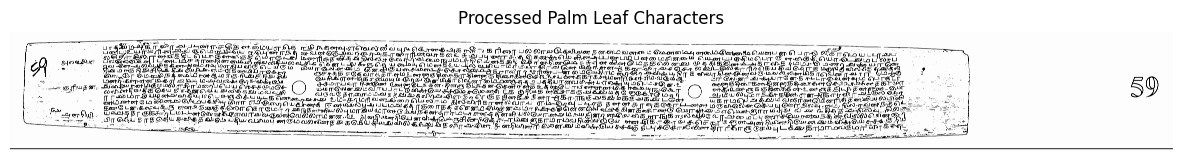

Number of characters replaced: 761
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\62\processed2.png
Extracted contours saved to C:\Users\91948\Desktop\palmleaf_test\62\extracted2


In [8]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile


class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
       
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        
        self.dropout = nn.Dropout(0.15)
        
        # Fully connected layer
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Adaptive pooling
        x = self.adaptive_pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Dropout
        x = self.dropout(x)
        
        # Fully connected layer
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
      
        # Set device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        # Load class indices
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
       
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        
        kernel = np.ones((3, 3), np.uint8)
        
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        
        return morphed_image

    def filter_components(self, binary_image):
        
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        
        filtered_binary = np.zeros_like(binary_image)
        
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:  
                filtered_binary[labels == i] = 255
        
        return filtered_binary

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
      
        output_image = input_image.copy()
        
       
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        
        for idx, contour in enumerate(contours):
            # bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
                character = input_image[y:y+h, x:x+w]
                
                contour_path = os.path.join(self.output_dir, f"contour_{idx}.png")
                cv2.imwrite(contour_path, character)
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                    
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f})")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                finally:
                    os.unlink(temp_path)
        
        return output_image, replaced_characters_count

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        filtered_image = self.filter_components(refined_image)

        processed_image, num_replaced = self.extract_and_replace_characters(
            input_image, filtered_image,
            min_height=35, max_height=170,
            min_width=35, max_width=170
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth" 
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\62\62_cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\62\processed2.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\62\extracted2"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

    processed_image, num_replaced = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"Number of characters replaced: {num_replaced}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted contours saved to {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu


C:\Users\91948\AppData\Local\Temp\ipykernel_30832\232117606.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.device

Model loaded successfully, trained on 69 classes
Contour 5 - Predicted: 32 (Confidence: 0.24), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\32\32_1.png
Contour 8 - Predicted: 62 (Confidence: 0.40), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\62\62_1.png
Contour 9 - Predicted: 22 (Confidence: 0.87), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\22\22_1.png
Contour 23 - Predicted: 27 (Confidence: 0.43), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\27\27_1.png
Contour 26 - Predicted: 62 (Confidence: 0.36), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\62\62_2.png
Contour 27 - Predicted: 48 (Confidence: 0.85), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\48\48_1.png
Contour 28 - Predicted: 35 (Confidence: 1.00), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\35\35_1.png
Contour 29 - Predicted: 32 (Confidence: 1.00), Saved to C:\Users\91948\Desktop\palmleaf_test\62\62_testdata\32\32_

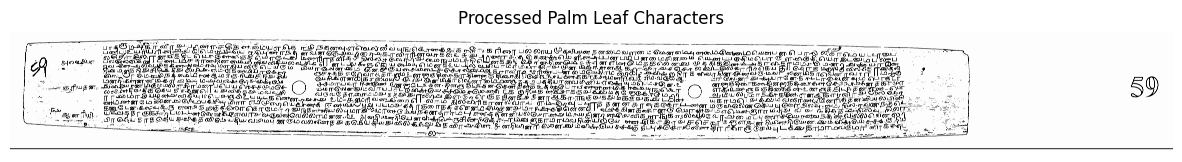


Number of characters replaced: 938
Total characters extracted: 938
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\62\processed2.png
Extracted characters organized by class in C:\Users\91948\Desktop\palmleaf_test\62\62_testdata


In [1]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile


class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
       
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        
        self.dropout = nn.Dropout(0.15)
        
        # Fully connected layer
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Adaptive pooling
        x = self.adaptive_pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Dropout
        x = self.dropout(x)
        
        # Fully connected layer
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
      
        # Set device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        # Load class indices
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
       
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        
        kernel = np.ones((3, 3), np.uint8)
        
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        
        return morphed_image

    def filter_components(self, binary_image):
        
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        
        filtered_binary = np.zeros_like(binary_image)
        
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:  
                filtered_binary[labels == i] = 255
        
        return filtered_binary

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
      
        output_image = input_image.copy()
        
        # Dictionary to store the count of characters saved in each class folder
        class_counts = {}
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            # bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
                character = input_image[y:y+h, x:x+w]
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # Create directory for this class if it doesn't exist
                    class_dir = os.path.join(self.output_dir, predicted_class)
                    os.makedirs(class_dir, exist_ok=True)
                    
                    # Update count for this class
                    if predicted_class not in class_counts:
                        class_counts[predicted_class] = 0
                    class_counts[predicted_class] += 1
                    
                    # Save the character image in its class directory
                    char_filename = f"{predicted_class}_{class_counts[predicted_class]}.png"
                    char_path = os.path.join(class_dir, char_filename)
                    cv2.imwrite(char_path, character)
                    
                    # Process replacement with ground truth if available
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                    
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f}), Saved to {char_path}")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                finally:
                    os.unlink(temp_path)
        
        # Print summary
        print("\nCharacter Extraction Summary:")
        for cls, count in class_counts.items():
            print(f"Class {cls}: {count} characters extracted")
        
        return output_image, replaced_characters_count, class_counts

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        filtered_image = self.filter_components(refined_image)

        processed_image, num_replaced, class_counts = self.extract_and_replace_characters(
            input_image, filtered_image,
            min_height=30, max_height=200,
            min_width=30, max_width=200
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced, class_counts

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth" 
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\62\62_cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\62\processed2.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\62\62_testdata"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

    processed_image, num_replaced, class_counts = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"\nNumber of characters replaced: {num_replaced}")
    print(f"Total characters extracted: {sum(class_counts.values())}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted characters organized by class in {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu
Model loaded successfully, trained on 68 classes


C:\Users\91948\AppData\Local\Temp\ipykernel_32888\1754380522.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devic

Contour 2 - Predicted: 6 (Confidence: 1.00), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\6\6_1.png
Contour 3 - Predicted: 18 (Confidence: 0.85), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\18\18_1.png
Contour 4 - Predicted: 23 (Confidence: 0.73), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\23\23_1.png
Contour 5 - Predicted: 7 (Confidence: 0.94), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\7\7_1.png
Contour 6 - Predicted: 12 (Confidence: 0.98), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\12\12_1.png
Contour 7 - Predicted: 7 (Confidence: 1.00), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\7\7_2.png
Contour 8 - Predicted: 6 (Confidence: 1.00), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\6\6_2.png
Contour 9 - Predicted: 6 (Confidence: 1.00), Saved to C:\Users\91948\Desktop\palmleaf_test\63\63_testdata\6\6_3.png
Contour 10 - Predicted: 17 (Confidence: 1.00), Saved to C:\User

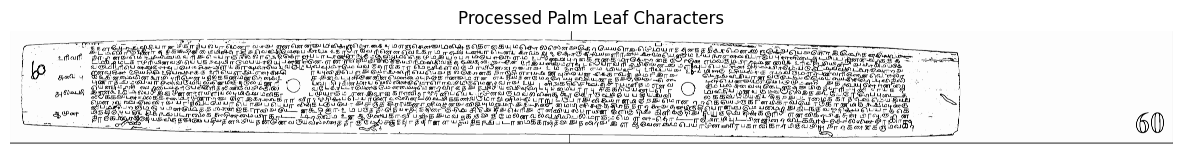


Number of characters replaced: 1087
Total characters extracted: 1087
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\63\processed63.png
Extracted characters organized by class in C:\Users\91948\Desktop\palmleaf_test\63\63_testdata


In [1]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile


class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
       
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        
        self.dropout = nn.Dropout(0.15)
        
        # Fully connected layer
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Adaptive pooling
        x = self.adaptive_pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Dropout
        x = self.dropout(x)
        
        # Fully connected layer
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
      
        # Set device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        # Load class indices
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
       
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        
        kernel = np.ones((3, 3), np.uint8)
        
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        
        return morphed_image

    def filter_components(self, binary_image):
        
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        
        filtered_binary = np.zeros_like(binary_image)
        
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:  
                filtered_binary[labels == i] = 255
        
        return filtered_binary

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
      
        output_image = input_image.copy()
        
        # Dictionary to store the count of characters saved in each class folder
        class_counts = {}
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            # bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
                character = input_image[y:y+h, x:x+w]
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # Create directory for this class if it doesn't exist
                    class_dir = os.path.join(self.output_dir, predicted_class)
                    os.makedirs(class_dir, exist_ok=True)
                    
                    # Update count for this class
                    if predicted_class not in class_counts:
                        class_counts[predicted_class] = 0
                    class_counts[predicted_class] += 1
                    
                    # Save the character image in its class directory
                    char_filename = f"{predicted_class}_{class_counts[predicted_class]}.png"
                    char_path = os.path.join(class_dir, char_filename)
                    cv2.imwrite(char_path, character)
                    
                    # Process replacement with ground truth if available
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                    
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f}), Saved to {char_path}")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                finally:
                    os.unlink(temp_path)
        
        # Print summary
        print("\nCharacter Extraction Summary:")
        for cls, count in class_counts.items():
            print(f"Class {cls}: {count} characters extracted")
        
        return output_image, replaced_characters_count, class_counts

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        filtered_image = self.filter_components(refined_image)

        processed_image, num_replaced, class_counts = self.extract_and_replace_characters(
            input_image, filtered_image,
            min_height=30, max_height=200,
            min_width=30, max_width=200
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced, class_counts

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better1.pth" 
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind1.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\63\63_cleaned_fsrcnn_x4.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\63\processed63.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\63\63_testdata"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

    processed_image, num_replaced, class_counts = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"\nNumber of characters replaced: {num_replaced}")
    print(f"Total characters extracted: {sum(class_counts.values())}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted characters organized by class in {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu
Model loaded successfully, trained on 69 classes


C:\Users\91948\AppData\Local\Temp\ipykernel_22960\3030562889.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devi

Contour 0 - Predicted: 14 (Confidence: 0.75)
Contour 1 - Predicted: 6 (Confidence: 0.97)
Contour 2 - Predicted: 1 (Confidence: 0.99)
Contour 3 - Predicted: 40 (Confidence: 0.98)
Contour 4 - Predicted: 9 (Confidence: 0.57)
Contour 5 - Predicted: 18 (Confidence: 0.69)
Contour 6 - Predicted: 17 (Confidence: 0.99)
Contour 7 - Predicted: 6 (Confidence: 0.85)
Contour 8 - Predicted: 27 (Confidence: 0.66)
Contour 9 - Predicted: 29 (Confidence: 0.38)
Contour 10 - Predicted: 52 (Confidence: 0.54)
Contour 11 - Predicted: 6 (Confidence: 0.99)
Contour 12 - Predicted: 18 (Confidence: 0.51)
Contour 13 - Predicted: 7 (Confidence: 1.00)
Contour 15 - Predicted: 6 (Confidence: 0.93)
Contour 16 - Predicted: 1 (Confidence: 1.00)
Contour 17 - Predicted: 7 (Confidence: 0.99)
Contour 18 - Predicted: 3 (Confidence: 1.00)
Contour 20 - Predicted: 20 (Confidence: 0.98)
Contour 21 - Predicted: 17 (Confidence: 0.80)
Contour 22 - Predicted: 20 (Confidence: 0.97)
Contour 23 - Predicted: 1 (Confidence: 1.00)
Contour 2

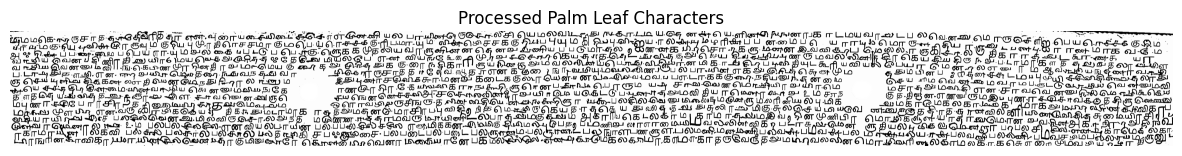

Number of characters replaced: 1003
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\processed.png
Extracted contours saved to C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\extracted


In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
    
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        self.dropout = nn.Dropout(0.15)
        
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  # Assume the whole file is class indices
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            # Return an empty tensor in case of error
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
        
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        
        kernel = np.ones((3, 3), np.uint8)
        
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        
        return morphed_image

    def filter_components(self, binary_image):
        # connected components
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        
        # empty image for filtered components
        filtered_binary = np.zeros_like(binary_image)
        
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        
        # components filtered based on area
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:  # Remove small noise
                filtered_binary[labels == i] = 255
        
        return filtered_binary

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
       
        output_image = input_image.copy()
        
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
    
                character = input_image[y:y+h, x:x+w]
                
                contour_path = os.path.join(self.output_dir, f"contour_{idx}.png")
                cv2.imwrite(contour_path, character)
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    # Predict
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # corresponding ground truth image
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        # Resizing ground truth to match original contour size
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        # Replace 
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f})")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                # Remove temporary file
                finally:
                    os.unlink(temp_path)
        
        return output_image, replaced_characters_count

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        filtered_image = self.filter_components(refined_image)
        
        processed_image, num_replaced = self.extract_and_replace_characters(
            input_image, filtered_image,
            min_height=30, max_height=200,
            min_width=30, max_width=200
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth"
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\61.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\processed.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\extracted"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

   
    processed_image, num_replaced = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

   
    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"Number of characters replaced: {num_replaced}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted contours saved to {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu


C:\Users\91948\AppData\Local\Temp\ipykernel_22152\3281167344.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devic

Model loaded successfully, trained on 69 classes
Contour 0 - Predicted: 14 (Confidence: 0.81)
Contour 1 - Predicted: 6 (Confidence: 0.95)
Contour 2 - Predicted: 40 (Confidence: 0.98)
Contour 3 - Predicted: 9 (Confidence: 0.49)
Contour 4 - Predicted: 18 (Confidence: 0.62)
Contour 5 - Predicted: 17 (Confidence: 0.99)
Contour 6 - Predicted: 6 (Confidence: 0.81)
Contour 7 - Predicted: 27 (Confidence: 0.63)
Contour 8 - Predicted: 29 (Confidence: 0.36)
Contour 9 - Predicted: 52 (Confidence: 0.65)
Contour 10 - Predicted: 6 (Confidence: 0.99)
Contour 11 - Predicted: 27 (Confidence: 0.48)
Contour 12 - Predicted: 7 (Confidence: 0.99)
Contour 14 - Predicted: 6 (Confidence: 0.91)
Contour 15 - Predicted: 1 (Confidence: 1.00)
Contour 16 - Predicted: 7 (Confidence: 0.99)
Contour 17 - Predicted: 3 (Confidence: 1.00)
Contour 19 - Predicted: 20 (Confidence: 0.98)
Contour 20 - Predicted: 17 (Confidence: 0.79)
Contour 21 - Predicted: 20 (Confidence: 0.94)
Contour 22 - Predicted: 1 (Confidence: 1.00)
Conto

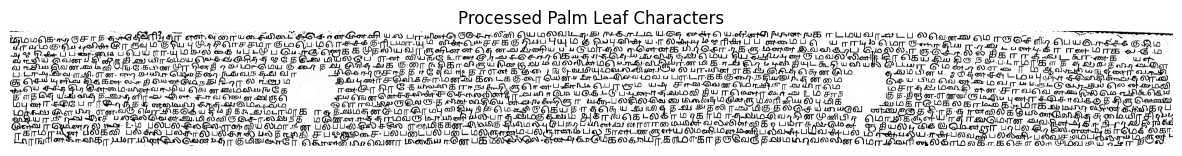

Number of characters replaced: 814
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\61_try\processed1.png
Extracted contours saved to C:\Users\91948\Desktop\palmleaf_test\61_try\ext1


In [8]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
    
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        self.dropout = nn.Dropout(0.15)
        
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  # Assume the whole file is class indices
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            # Return an empty tensor in case of error
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
        
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        
        kernel = np.ones((3, 3), np.uint8)
        eroded = cv2.dilate(binary_image, kernel, iterations=1)
        morphed_image = cv2.dilate(eroded, kernel, iterations=1)
        
        return morphed_image

    def filter_components(self, binary_image):
        # connected components
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
        
        # empty image for filtered components
        filtered_binary = np.zeros_like(binary_image)
        
        avg_area = np.mean(stats[1:, cv2.CC_STAT_AREA])
        
        # components filtered based on area
        for i in range(1, num_labels):
            if stats[i, cv2.CC_STAT_AREA] > avg_area * 0.5:  # Remove small noise
                filtered_binary[labels == i] = 255
        
        return filtered_binary

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
       
        output_image = input_image.copy()
        
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
    
                character = input_image[y:y+h, x:x+w]
                
                contour_path = os.path.join(self.output_dir, f"contour_{idx}.png")
                cv2.imwrite(contour_path, character)
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    # Predict
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # corresponding ground truth image
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        # Resizing ground truth to match original contour size
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        # Replace 
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f})")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                # Remove temporary file
                finally:
                    os.unlink(temp_path)
        
        return output_image, replaced_characters_count

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        filtered_image = self.filter_components(refined_image)
        
        processed_image, num_replaced = self.extract_and_replace_characters(
            input_image, filtered_image,
            min_height=60, max_height=175,
            min_width=60, max_width=175
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth"
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\61.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61_try\processed1.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61_try\ext1"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

   
    processed_image, num_replaced = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

   
    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"Number of characters replaced: {num_replaced}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted contours saved to {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu


C:\Users\91948\AppData\Local\Temp\ipykernel_19312\3252499500.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devic

Model loaded successfully, trained on 69 classes
Contour 16 - Predicted: 27 (Confidence: 0.39)
Contour 18 - Predicted: 14 (Confidence: 0.75)
Contour 19 - Predicted: 6 (Confidence: 0.97)
Contour 20 - Predicted: 1 (Confidence: 0.99)
Contour 21 - Predicted: 40 (Confidence: 0.98)
Contour 25 - Predicted: 9 (Confidence: 0.57)
Contour 27 - Predicted: 18 (Confidence: 0.69)
Contour 28 - Predicted: 17 (Confidence: 0.99)
Contour 29 - Predicted: 6 (Confidence: 0.85)
Contour 30 - Predicted: 27 (Confidence: 0.66)
Contour 31 - Predicted: 29 (Confidence: 0.38)
Contour 32 - Predicted: 52 (Confidence: 0.54)
Contour 33 - Predicted: 6 (Confidence: 0.99)
Contour 34 - Predicted: 18 (Confidence: 0.51)
Contour 35 - Predicted: 7 (Confidence: 1.00)
Contour 37 - Predicted: 6 (Confidence: 0.93)
Contour 38 - Predicted: 1 (Confidence: 1.00)
Contour 39 - Predicted: 7 (Confidence: 0.99)
Contour 40 - Predicted: 3 (Confidence: 1.00)
Contour 44 - Predicted: 20 (Confidence: 0.98)
Contour 45 - Predicted: 17 (Confidence: 0

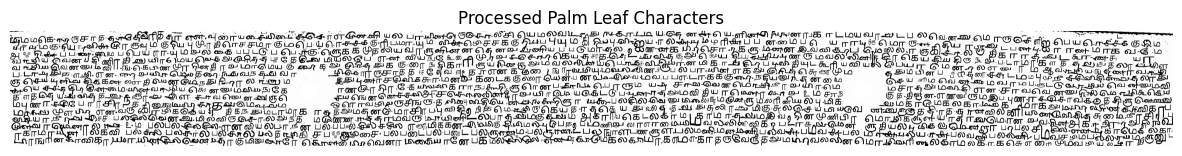

Number of characters replaced: 1115
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\61_try\processed.png
Extracted contours saved to C:\Users\91948\Desktop\palmleaf_test\61_try\extracted


In [2]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
    
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        self.dropout = nn.Dropout(0.15)
        
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  # Assume the whole file is class indices
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            # Return an empty tensor in case of error
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
        
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        inverted = cv2.bitwise_not(binary_image)
        eroded = cv2.erode(inverted, kernel, iterations=1)
        morphed_image = cv2.bitwise_not(eroded)
        return morphed_image

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
       
        output_image = input_image.copy()
        
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
    
                character = input_image[y:y+h, x:x+w]
                
                contour_path = os.path.join(self.output_dir, f"contour_{idx}.png")
                cv2.imwrite(contour_path, character)
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    # Predict
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # corresponding ground truth image
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        # Resizing ground truth to match original contour size
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        # Replace 
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f})")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                # Remove temporary file
                finally:
                    os.unlink(temp_path)
        
        return output_image, replaced_characters_count

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        processed_image, num_replaced = self.extract_and_replace_characters(
            input_image, refined_image,
            min_height=30, max_height=200,
            min_width=30, max_width=200
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth"
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\61.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61_try\processed.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61_try\extracted"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

   
    processed_image, num_replaced = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

   
    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"Number of characters replaced: {num_replaced}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted contours saved to {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu
Model loaded successfully, trained on 69 classes


C:\Users\91948\AppData\Local\Temp\ipykernel_22152\405930341.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.device

Contour 22 - Predicted: 1 (Confidence: 0.99)
Contour 23 - Predicted: 40 (Confidence: 0.98)
Contour 27 - Predicted: 17 (Confidence: 0.99)
Contour 28 - Predicted: 9 (Confidence: 0.58)
Contour 30 - Predicted: 18 (Confidence: 0.76)
Contour 31 - Predicted: 6 (Confidence: 0.90)
Contour 32 - Predicted: 27 (Confidence: 0.64)
Contour 33 - Predicted: 29 (Confidence: 0.39)
Contour 34 - Predicted: 52 (Confidence: 0.67)
Contour 35 - Predicted: 6 (Confidence: 0.99)
Contour 36 - Predicted: 18 (Confidence: 0.54)
Contour 37 - Predicted: 7 (Confidence: 0.99)
Contour 39 - Predicted: 6 (Confidence: 0.94)
Contour 40 - Predicted: 1 (Confidence: 1.00)
Contour 41 - Predicted: 7 (Confidence: 0.99)
Contour 42 - Predicted: 3 (Confidence: 1.00)
Contour 46 - Predicted: 20 (Confidence: 0.99)
Contour 47 - Predicted: 1 (Confidence: 1.00)
Contour 49 - Predicted: 17 (Confidence: 0.69)
Contour 50 - Predicted: 20 (Confidence: 0.99)
Contour 51 - Predicted: 19 (Confidence: 0.70)
Contour 53 - Predicted: 20 (Confidence: 1.00

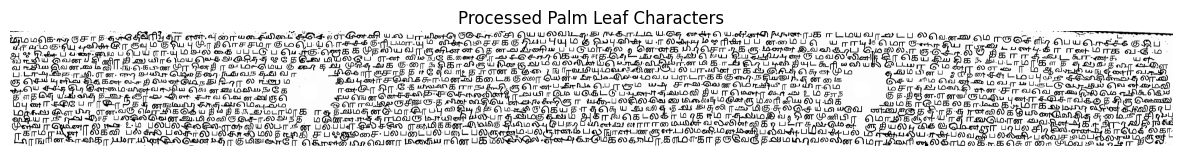

Number of characters replaced: 929
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\61_try\processed2.png
Extracted contours saved to C:\Users\91948\Desktop\palmleaf_test\61_try\ext2


In [9]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
    
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        self.dropout = nn.Dropout(0.15)
        
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  # Assume the whole file is class indices
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            # Return an empty tensor in case of error
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
        
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        eroded = cv2.erode(binary_image, kernel, iterations=1)
        morphed_image = cv2.dilate(eroded, kernel, iterations=1)
        return morphed_image

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
       
        output_image = input_image.copy()
        
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
    
                character = input_image[y:y+h, x:x+w]
                
                contour_path = os.path.join(self.output_dir, f"contour_{idx}.png")
                cv2.imwrite(contour_path, character)
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    # Predict
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # corresponding ground truth image
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        # Resizing ground truth to match original contour size
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        # Replace 
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f})")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                # Remove temporary file
                finally:
                    os.unlink(temp_path)
        
        return output_image, replaced_characters_count

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        processed_image, num_replaced = self.extract_and_replace_characters(
            input_image, refined_image,
            min_height=60, max_height=175,
            min_width=60, max_width=175
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth"
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\61.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61_try\processed2.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61_try\ext2"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

   
    processed_image, num_replaced = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

   
    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"Number of characters replaced: {num_replaced}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted contours saved to {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

Using device: cpu
Model loaded successfully, trained on 69 classes


C:\Users\91948\AppData\Local\Temp\ipykernel_23048\3793160880.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=self.devic

Contour 18 - Predicted: 14 (Confidence: 0.75)
Contour 19 - Predicted: 6 (Confidence: 0.97)
Contour 20 - Predicted: 1 (Confidence: 0.99)
Contour 21 - Predicted: 40 (Confidence: 0.98)
Contour 25 - Predicted: 9 (Confidence: 0.57)
Contour 27 - Predicted: 18 (Confidence: 0.69)
Contour 28 - Predicted: 17 (Confidence: 0.99)
Contour 29 - Predicted: 6 (Confidence: 0.85)
Contour 30 - Predicted: 27 (Confidence: 0.66)
Contour 31 - Predicted: 29 (Confidence: 0.38)
Contour 32 - Predicted: 52 (Confidence: 0.54)
Contour 33 - Predicted: 6 (Confidence: 0.99)
Contour 34 - Predicted: 18 (Confidence: 0.51)
Contour 35 - Predicted: 7 (Confidence: 1.00)
Contour 37 - Predicted: 6 (Confidence: 0.93)
Contour 38 - Predicted: 1 (Confidence: 1.00)
Contour 39 - Predicted: 7 (Confidence: 0.99)
Contour 40 - Predicted: 3 (Confidence: 1.00)
Contour 44 - Predicted: 20 (Confidence: 0.98)
Contour 45 - Predicted: 17 (Confidence: 0.80)
Contour 46 - Predicted: 20 (Confidence: 0.97)
Contour 47 - Predicted: 1 (Confidence: 1.00)

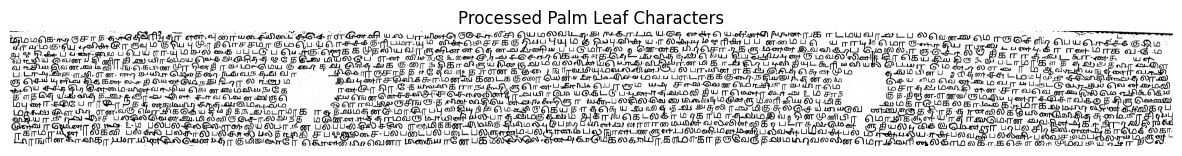

Number of characters replaced: 915
Processed image saved to C:\Users\91948\Desktop\palmleaf_test\61_try\processed3.png
Extracted contours saved to C:\Users\91948\Desktop\palmleaf_test\61_try\ext3


In [1]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import tempfile

class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
    
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        self.dropout = nn.Dropout(0.15)
        
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x

class PalmLeafCharacterProcessor:
    def __init__(self, model_path, class_indices_path, ground_truth_dir, output_dir):
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        with open(class_indices_path, 'r') as f:
            class_data = json.load(f)
            
        # Extract class indices from data
        if 'class_to_idx' in class_data:
            class_indices = class_data['class_to_idx']
        elif 'classes' in class_data:
            class_indices = {cls: idx for idx, cls in enumerate(class_data['classes'])}
        else:
            class_indices = class_data  # Assume the whole file is class indices
            
        self.idx_to_class = {v: k for k, v in class_indices.items()}
        
        self.IMG_SIZE = (64, 64)
        
        # transform for preprocessing
        self.transform = transforms.Compose([
            transforms.Resize(self.IMG_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        checkpoint = torch.load(model_path, map_location=self.device)
        
        num_classes = len(self.idx_to_class)
        
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                num_classes = checkpoint.get('num_classes', num_classes)
                state_dict = checkpoint['model_state_dict']
            else:
                state_dict = checkpoint
                
            self.model = BetterCharRecognitionCNN(num_classes=num_classes).to(self.device)
            self.model.load_state_dict(state_dict)
        else:
            self.model = checkpoint
            
        self.model.eval()
        
        self.ground_truth_dir = ground_truth_dir
        self.output_dir = output_dir
        
        os.makedirs(self.output_dir, exist_ok=True)
        
        print(f"Model loaded successfully, trained on {num_classes} classes")

    def preprocess_image(self, image_path):
        
        try:
            img = Image.open(image_path).convert('RGB')
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)
            return img_tensor
        except Exception as e:
            print(f"Error preprocessing image {image_path}: {e}")
            # Return an empty tensor in case of error
            return torch.zeros((1, 3, *self.IMG_SIZE)).to(self.device)

    def predict_image(self, image_path):
        
        img_tensor = self.preprocess_image(image_path)
        
        with torch.no_grad():
            output = self.model(img_tensor)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            predicted_class_index = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0][predicted_class_index].item()
            
        predicted_class_name = self.idx_to_class.get(predicted_class_index, f"Unknown-{predicted_class_index}")
        return predicted_class_name, confidence

    def preprocess_input_image(self, image_path):
        
        input_image = cv2.imread(image_path)
        if input_image is None:
            raise ValueError(f"Error: Could not read the image at {image_path}")
        
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        
        blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
        
        binary_image = cv2.adaptiveThreshold(
            blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 31, 15
        )
        
        return input_image, binary_image

    def refine_segmentation(self, binary_image):
        kernel = np.ones((3, 3), np.uint8)
        #eroded = cv2.erode(binary_image, kernel, iterations=1)
        morphed_image = cv2.dilate(binary_image, kernel, iterations=1)
        return morphed_image

    def extract_and_replace_characters(self, input_image, binary_image, 
                                       min_height=12, max_height=40, 
                                       min_width=12, max_width=55):
       
        output_image = input_image.copy()
        
        replaced_characters_count = 0
        
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for idx, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            
            if min_height <= h <= max_height and min_width <= w <= max_width:
    
                character = input_image[y:y+h, x:x+w]
                
                contour_path = os.path.join(self.output_dir, f"contour_{idx}.png")
                cv2.imwrite(contour_path, character)
                
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
                    temp_path = temp_file.name
                    cv2.imwrite(temp_path, character)
                
                try:
                    # Predict
                    predicted_class, confidence = self.predict_image(temp_path)
                    
                    # corresponding ground truth image
                    ground_truth_path = os.path.join(self.ground_truth_dir, f"{predicted_class}.png")
                    
                    if os.path.exists(ground_truth_path):
                        ground_truth_img = cv2.imread(ground_truth_path)
                        
                        # Resizing ground truth to match original contour size
                        ground_truth_resized = cv2.resize(ground_truth_img, (w, h))
                        
                        # Replace 
                        output_image[y:y+h, x:x+w] = ground_truth_resized
                        
                        replaced_characters_count += 1
                
                    print(f"Contour {idx} - Predicted: {predicted_class} (Confidence: {confidence:.2f})")
                
                except Exception as e:
                    print(f"Error processing character: {e}")
                
                # Remove temporary file
                finally:
                    os.unlink(temp_path)
        
        return output_image, replaced_characters_count

    def process_palm_leaf(self, input_image_path, visualize=False):
        
        input_image, binary_image = self.preprocess_input_image(input_image_path)
        
        refined_image = self.refine_segmentation(binary_image)
        
        processed_image, num_replaced = self.extract_and_replace_characters(
            input_image, refined_image,
            min_height=60, max_height=175,
            min_width=60, max_width=175
        )
        
        if visualize:
            plt.figure(figsize=(15, 10))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
            plt.title("Processed Palm Leaf Characters")
            plt.axis('off')
            plt.show()
        
        return processed_image, num_replaced

def main():
    MODEL_PATH = r"C:\Users\91948\Desktop\palmleaf_test\better.pth"
    CLASS_INDICES_PATH = r"C:\Users\91948\Desktop\palmleaf_test\class_ind.json"
    GROUND_TRUTH_DIR = r"C:\Users\91948\Desktop\palmleaf_test\ground_truth"
    INPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61\punch_hole_removal_top2\61.jpg"
    OUTPUT_IMAGE_PATH = r"C:\Users\91948\Desktop\palmleaf_test\61_try\processed3.png"
    CONTOURS_OUTPUT_DIR = r"C:\Users\91948\Desktop\palmleaf_test\61_try\ext3"

    processor = PalmLeafCharacterProcessor(
        MODEL_PATH, 
        CLASS_INDICES_PATH, 
        GROUND_TRUTH_DIR,
        CONTOURS_OUTPUT_DIR
    )

   
    processed_image, num_replaced = processor.process_palm_leaf(
        INPUT_IMAGE_PATH, 
        visualize=True
    )

   
    cv2.imwrite(OUTPUT_IMAGE_PATH, processed_image)
    print(f"Number of characters replaced: {num_replaced}")
    print(f"Processed image saved to {OUTPUT_IMAGE_PATH}")
    print(f"Extracted contours saved to {CONTOURS_OUTPUT_DIR}")

if __name__ == "__main__":
    main()

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True

model = VGG16(weights='imagenet', include_top=False)

imdir = r'C:\Users\91948\Desktop\palmleaf_test\62\extracted'
targetdir = r'C:\Users\91948\Desktop\palmleaf_test\62\clustered'
number_clusters = 50


In [3]:
# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*/*.png'))
filelist.sort()
featurelist = []
labels = []



In [4]:

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.PNG'))  # Changed from '*/*.JPG' to '*.JPG'
filelist.sort()
print(f"Number of png files found: {len(filelist)}")

# If no files were found, try with different case
if len(filelist) == 0:
    filelist = glob.glob(os.path.join(imdir, '*.png'))  # Try lowercase extension
    filelist.sort()
    print(f"Number of png files found: {len(filelist)}")

featurelist = []
labels = []

# Process only if files were found
if len(filelist) > 0:
    for i, imagepath in enumerate(filelist):
        try:
            print(f"Processing image {i+1}/{len(filelist)}")
            
            img = image.load_img(imagepath, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)
            
            features = model.predict(img_data)
            feature_vector = features.flatten()
            featurelist.append(feature_vector)
            
            # Use filename as label if needed
            filename = os.path.basename(imagepath)
            labels.append(filename)
            
        except Exception as e:
            print(f"Error processing {imagepath}: {e}")

    print(f"Total features extracted: {len(featurelist)}")
    
    # Before running K-means, convert to numpy array
    if len(featurelist) > 0:
        X = np.array(featurelist)
        print(f"Feature array shape: {X.shape}")
        kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(X)
    else:
        print("No features were extracted successfully.")
else:
    print("No JPG files found in the specified directory.")



Number of png files found: 938
Processing image 1/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Processing image 2/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
Processing image 3/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Processing image 4/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Processing image 5/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Processing image 6/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Processing image 7/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
Processing image 8/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Processing image 9/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
Processing image 10/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Processing image 11/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Processing image 12/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Processing image 13/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Processing image 14/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Processing image 15/938
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Processing image 16/938
1/1 ━━━━━

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [5]:

try:
    os.makedirs(targetdir)
except OSError:
    pass

In [6]:
print("\n")
for i, m in enumerate(kmeans.labels_):
    try:
        os.makedirs(targetdir+'\\'+str(m))
        #print(m)
    except OSError:
        pass
    print("Copy: %s / %s" %(i+1, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir +'/'+ str(m) + "/" + str(i) + ".jpg")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    precision_recall_curve, average_precision_score,
    roc_curve, auc, roc_auc_score
)
from itertools import cycle
import json


class BetterCharRecognitionCNN(nn.Module):
    def __init__(self, num_classes=69):
        super(BetterCharRecognitionCNN, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
        
        self.dropout = nn.Dropout(0.15)
        
        self.fc = nn.Linear(32 * 4 * 4, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.dropout(x)
        
        x = self.fc(x)
        
        return x


class CharacterDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        
        self.samples = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        
        try:
            image = Image.open(img_path).convert('RGB')
            
            if self.transform:
                image = self.transform(image)
            
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            default_img = torch.zeros((3, 64, 64))
            return default_img, label

# Evaluation function from the training code
def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(data_loader.dataset)
    epoch_acc = running_corrects.double() / len(data_loader.dataset)
    
    return epoch_loss, epoch_acc.item()

BASE_DIR = r"C:\Users\91948\Desktop\palmleaf_test"
MODEL_PATH = os.path.join(BASE_DIR, "better.pth")  
data_dir = os.path.join(BASE_DIR, "input2")
CLASS_INDICES_PATH = os.path.join(BASE_DIR, "class_ind.json") 


IMG_SIZE = (64, 64)
BATCH_SIZE = 32

try:
    with open(CLASS_INDICES_PATH, 'r') as f:
        class_indices = json.load(f)
    class_names = class_indices.get('classes', [])
    num_classes = len(class_names)
    print(f"Loaded {num_classes} classes from {CLASS_INDICES_PATH}")
except FileNotFoundError:
    print(f"Class indices file not found at {CLASS_INDICES_PATH}")
    

transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


full_dataset = CharacterDataset(
    root_dir=data_dir, 
    transform=transform
)


if not class_names:
    class_names = full_dataset.classes
    num_classes = len(class_names)
    print(f"Detected {num_classes} classes from dataset")

# Split dataset 
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, 
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)  # For reproducibility - same seed as training
)

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Testing set size: {len(test_dataset)}")


train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


checkpoint = torch.load(MODEL_PATH, map_location=device)

if isinstance(checkpoint, dict):
    if 'model_state_dict' in checkpoint:
        num_classes = checkpoint.get('num_classes', num_classes)
        state_dict = checkpoint['model_state_dict']
        
        if 'final_test_accuracy' in checkpoint:
            print(f"Model saved with test accuracy: {checkpoint['final_test_accuracy']*100:.2f}%")
    else:
        state_dict = checkpoint
    
    model = BetterCharRecognitionCNN(num_classes=num_classes).to(device)
    model.load_state_dict(state_dict)
else:
    model = checkpoint

model.eval()  
print("Model loaded successfully")


criterion = nn.CrossEntropyLoss()

train_loss, train_acc = evaluate(model, train_loader, criterion, device)
val_loss, val_acc = evaluate(model, val_loader, criterion, device)
test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")

# true labels and predictions FROM TEST DATA
y_true = []
y_pred_prob = []

with torch.no_grad():
    for inputs, labels in test_loader:  
        inputs = inputs.to(device)
        outputs = model(inputs)
        probabilities = nn.functional.softmax(outputs, dim=1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred_prob.extend(probabilities.cpu().numpy())


y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true_onehot = np.zeros((len(y_true), num_classes))
for i, label in enumerate(y_true):
    y_true_onehot[i, label] = 1

# 1. Precision-Recall Curve for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_onehot[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_true_onehot[:, i], y_pred_prob[:, i])

# Calculate micro-average precision-recall curve and AP score
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_true_onehot.ravel(), y_pred_prob.ravel()
)
average_precision["micro"] = average_precision_score(
    y_true_onehot.ravel(), y_pred_prob.ravel(), average="micro"
)

# Setup plot details
colors = cycle(['blue', 'red', 'green', 'navy', 'turquoise', 'darkorange',
               'cornflowerblue', 'teal', 'purple', 'pink'])

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(12, 10))
plt.plot(recall["micro"], precision["micro"], color='gold', lw=4,
         label=f'Micro-average (area = {average_precision["micro"]:.2f})')

# Plot Precision-Recall curves for a subset of classes for readability
# Select top and bottom classes by average precision
ap_values = [(i, avg_p) for i, avg_p in average_precision.items() 
             if isinstance(i, int)]  
ap_values.sort(key=lambda x: x[1])

num_to_select = min(5, num_classes // 2)
selected_classes = [idx for idx, _ in ap_values[:num_to_select] + ap_values[-num_to_select:]]

for i, color in zip(selected_classes, colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{class_names[i]} (AP={average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Test Data)')  # Updated title to reflect test data
plt.legend(loc="best")
plt.grid(True)
plt.savefig(os.path.join(BASE_DIR, "precision_recall_curve_test.png"), dpi=300)
print(f" Precision-Recall curve saved to {os.path.join(BASE_DIR, 'precision_recall_curve_test.png')}")
plt.close()

# 2. ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(12, 10))

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)


for i, color in zip(selected_classes, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - Test Data')  # Updated title
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(BASE_DIR, "roc_curve_test.png"), dpi=300)
print(f"ROC curve saved to {os.path.join(BASE_DIR, 'roc_curve_test.png')}")
plt.close()

# 3. AUC Scores Visualization
# Calculate AUC for each class
auc_scores = [roc_auc[i] for i in range(num_classes)]

# Create a bar chart of AUC scores
plt.figure(figsize=(14, 10))
sorted_indices = np.argsort(auc_scores)
plt.bar(np.arange(len(class_names)), [auc_scores[i] for i in sorted_indices], color='skyblue')
plt.xlabel('Class')
plt.ylabel('AUC Score')
plt.title('AUC Scores by Class - Test Data')  # Updated title
plt.xticks(np.arange(len(class_names)), [class_names[i] for i in sorted_indices], rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, "auc_scores_test.png"), dpi=300)
print(f" AUC scores chart saved to {os.path.join(BASE_DIR, 'auc_scores_test.png')}")
plt.close()

# 4. Confusion Matrix Visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Data')  # Updated title
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, "confusion_matrix_test.png"), dpi=300)
print(f" Confusion matrix saved to {os.path.join(BASE_DIR, 'confusion_matrix_test.png')}")
plt.close()

# 5. Calculate and print global metrics
# Classification report
print("\nClassification Report (Test Data):")  # Updated to reflect test data
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate macro and weighted average AUC
try:
    # For multiclass AUC, use OvR (One-vs-Rest) strategy
    macro_roc_auc = roc_auc_score(y_true_onehot, y_pred_prob, average='macro', multi_class='ovr')
    weighted_roc_auc = roc_auc_score(y_true_onehot, y_pred_prob, average='weighted', multi_class='ovr')
    
    print(f"\nMacro-average ROC AUC: {macro_roc_auc:.4f}")
    print(f"Weighted-average ROC AUC: {weighted_roc_auc:.4f}")
    print(f"Micro-average ROC AUC: {roc_auc['micro']:.4f}")
    
except ValueError as e:
    print(f"Note: Could not calculate global AUC metrics - {e}")
    print("This may happen if some classes don't have samples in the test set.")
    
# Additional: Calculate and print mean Average Precision
mean_ap = np.mean([avg_p for i, avg_p in average_precision.items() if isinstance(i, int)])
print(f"Mean Average Precision (mAP): {mean_ap:.4f}")
print(f"Macro-average Precision: {np.mean([average_precision[i] for i in range(num_classes)]):.4f}")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Assuming we already have the confusion matrix (cm) and class_names from the main code
# Function to split and plot confusion matrices in groups
def plot_grouped_confusion_matrices(cm, class_names, output_dir, group_size=10):
    num_classes = len(class_names)
    num_groups = (num_classes + group_size - 1) // group_size  # Ceiling division
    
    for group_idx in range(num_groups):
        start_idx = group_idx * group_size
        end_idx = min((group_idx + 1) * group_size, num_classes)
        
        # Extract the relevant portion of the confusion matrix and class names
        group_cm = cm[start_idx:end_idx, start_idx:end_idx]
        group_class_names = class_names[start_idx:end_idx]
        
        # Create PDF file
        pdf_filename = os.path.join(output_dir, f"confusion_matrix_group_{group_idx+1}.pdf")
        
        with PdfPages(pdf_filename) as pdf:
            # Create figure with appropriate size
            fig, ax = plt.subplots(figsize=(12, 10))
            
            # Plot confusion matrix
            sns.heatmap(
                group_cm, 
                annot=True,  # Show numbers in cells
                fmt='d',     # Format as integers
                cmap='Blues',
                xticklabels=group_class_names,
                yticklabels=group_class_names,
                ax=ax
            )
            
            # Set title and labels
            ax.set_title(f'Confusion Matrix - Classes {start_idx+1} to {end_idx} ({group_class_names[0]} to {group_class_names[-1]})', 
                        fontsize=14, pad=20)
            ax.set_xlabel('Predicted Label', fontsize=12, labelpad=10)
            ax.set_ylabel('True Label', fontsize=12, labelpad=10)
            
            # Rotate axis labels for better readability
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(rotation=0, fontsize=10)
            
            # Adjust layout
            plt.tight_layout()
            
            # Save the current figure to PDF
            pdf.savefig(fig)
            plt.close(fig)
            
        print(f"Saved confusion matrix group {group_idx+1} to {pdf_filename}")

# Call the function to create the grouped confusion matrix plots
plot_grouped_confusion_matrices(cm, class_names, BASE_DIR, group_size=10)

# Optional: Create an overall summary PDF with all matrices
def create_summary_pdf(cm, class_names, output_dir, group_size=10):
    num_classes = len(class_names)
    num_groups = (num_classes + group_size - 1) // group_size
    
    pdf_filename = os.path.join(output_dir, "confusion_matrices_all_groups.pdf")
    
    with PdfPages(pdf_filename) as pdf:
        # Create a summary page
        fig = plt.figure(figsize=(12, 8))
        plt.text(0.5, 0.5, f'Confusion Matrices Summary\n\nTotal Classes: {num_classes}\nGroups: {num_groups}',
                 horizontalalignment='center', verticalalignment='center', fontsize=16)
        plt.axis('off')
        pdf.savefig(fig)
        plt.close(fig)
        
        # Add each group's confusion matrix
        for group_idx in range(num_groups):
            start_idx = group_idx * group_size
            end_idx = min((group_idx + 1) * group_size, num_classes)
            
            group_cm = cm[start_idx:end_idx, start_idx:end_idx]
            group_class_names = class_names[start_idx:end_idx]
            
            fig, ax = plt.subplots(figsize=(12, 10))
            
            sns.heatmap(
                group_cm, 
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=group_class_names,
                yticklabels=group_class_names,
                ax=ax
            )
            
            ax.set_title(f'Group {group_idx+1}: Classes {start_idx+1} to {end_idx}', fontsize=14, pad=20)
            ax.set_xlabel('Predicted Label', fontsize=12, labelpad=10)
            ax.set_ylabel('True Label', fontsize=12, labelpad=10)
            
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(rotation=0, fontsize=10)
            
            plt.tight_layout()
            pdf.savefig(fig)
            plt.close(fig)
    
    print(f"Saved summary PDF with all confusion matrices to {pdf_filename}")

# Uncomment to create a summary PDF with all matrices
create_summary_pdf(cm, class_names, BASE_DIR, group_size=10)